In [ ]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(igraph)
library(cluster)
library(ggplot2)

# **PART 1**

# Importing the Data

In [ ]:
nodes <- read.csv("/content/sample_data/nodes.csv")
edges <- read.csv("/content/sample_data/edges.csv")

In [ ]:
head(nodes, 2)

id isdone spotifyid             
1 4  True   6FXMGgJwohJLUSr5nVlf9X
2 9  True   2YVF0Ou5zIc4mpgtLIlGN0
  genres                                               popularity followers
1 ['big beat', 'downtempo', 'electronica', 'trip hop'] 67         1839167  
2 ['dream trance', 'eurodance', 'trance']              63          151858  
  histogram                                                                                                                                                                                                                                                                                                                                                                                       
1 [0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
2 [0, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]                                                                                    
  num_release first_release last_release name           network_rank
1 31          1991-01-01    2016-07-29   Massive Attack 5.751516e-09
2  9          1996-01-01    2004-02-10   Robert Miles   9.643217e-10

In [ ]:
head(edges, 10)

id_1   id_2   songid  song                         
1  600808  57186  847181 Young Money All Stars, Part 2
2  600808 624088 1036845 Moment 4 Life                
3  600808 262731 1615002 Work                         
4  600808 262731 2224335 Work (Remixes)               
5  600808  57186 1088100 She Will                     
6  600808 624088 1103219 Make Me Proud                
7  600808 262731 2190722 Too Good                     
8  600808 262731 2364253 Take Care                    
9  600808 353667 1220971 Free Spirit                  
10 600808 688686 1112232 Round of Applause

# Creating the graph

In [ ]:
graph <- graph_from_data_frame(edges, directed = FALSE, vertices = nodes)

graph

IGRAPH 725a576 UN-- 12905 321566 -- 
+ attr: name (v/c), isdone (v/c), spotifyid (v/c), genres (v/c),
| popularity (v/n), followers (v/n), histogram (v/c), num_release
| (v/n), first_release (v/c), last_release (v/c), network_rank (v/n),
| songid (e/n), song (e/c)
+ edges from 725a576 (vertex names):
 [1] Lil Wayne--Drake             Drake    --Nicki Minaj      
 [3] Rihanna  --Drake             Rihanna  --Drake            
 [5] Lil Wayne--Drake             Drake    --Nicki Minaj      
 [7] Rihanna  --Drake             Rihanna  --Drake            
 [9] Rick Ross--Drake             Drake    --Waka Flocka Flame
+ ... omitted several edges

# **PART 2**

# PageRank

In [ ]:
pagerank <- page_rank(graph)$vector
nodes$pagerank <- pagerank

##### 2 nodes with the most PageRank

In [ ]:
head(nodes[order(-pagerank), ], 2)

id    isdone spotifyid             
1346 11285 True   4NJhFmfw43RLBLjQvxDuRS
271   1021 True   2wOqMjp9TyABvtHdOSOTUS
     genres                                                                    
1346 ['classical', 'classical era']                                            
271  ['classical', 'classical era', 'early romantic era', 'german romanticism']
     popularity followers
1346 79         4473353  
271  76         4323890  
     histogram                                                                                                                                                                                                                                                                                                                                                                                                                              
1346 [0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 10, 10, 11, 11, 12, 14, 15, 15, 16, 17, 19, 19, 19, 20, 20, 21, 22, 22, 22, 26, 27, 27, 32, 39, 48, 49, 62, 80, 81, 104, 133, 133, 159, 212, 269, 309, 347, 383, 389, 423, 454, 491, 503, 528, 548, 551, 570, 598, 617, 626, 641, 656, 663, 675, 693, 699, 733, 741, 749, 752, 759, 764, 767, 773, 781, 785, 788, 793, 801, 805, 806, 809, 811, 813, 814, 820]
271  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 15, 17, 22, 22, 25, 27, 28, 30, 31, 34, 34, 37, 38, 41, 44, 46, 48, 49, 51, 54, 56, 58, 61, 65, 75, 83, 94, 118, 177, 214, 252, 286, 329, 363, 410, 448, 485, 521, 564, 593, 616, 639, 666, 686, 714, 740, 754, 769, 785, 793, 805, 812, 820, 826, 832, 834, 839, 842, 852, 856]                             
     num_release first_release last_release name                   
1346 821         1950-01-01    2020-11-06   Wolfgang Amadeus Mozart
271  857         1918-01-01    2020-12-11   Ludwig van Beethoven   
     network_rank pagerank   
1346 0.1531252    0.003839294
271  0.1462332    0.003695074

##### 2 nodes with the least PageRank

In [ ]:
tail(nodes[order(-pagerank), ], 2)

id      isdone spotifyid              genres popularity followers
12899 2225691 True   7rk8Vf5bFBsIeacJ8iDmuS []     7          981      
12900 2225816 True   6DvutSZhBdykrlnJUi43rp []     0           17      
      histogram                                                                                                                                                                                                                                                                                                   
12899 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12900 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
      num_release first_release last_release name          network_rank
12899 0                                      Adrien Lamont NA          
12900 1           2020-10-08    2020-10-08   D.J. Mixxy B  NA          
      pagerank  
12899 1.2964e-05
12900 1.2964e-05

# Degree Centrality

In [ ]:
degree <- degree(graph)
nodes$degree <- degree

### 2 nodes with the most Degree Centrality

In [ ]:
head(nodes[order(-degree), ], 2)

id    isdone spotifyid             
271   1021 True   2wOqMjp9TyABvtHdOSOTUS
1346 11285 True   4NJhFmfw43RLBLjQvxDuRS
     genres                                                                    
271  ['classical', 'classical era', 'early romantic era', 'german romanticism']
1346 ['classical', 'classical era']                                            
     popularity followers
271  76         4323890  
1346 79         4473353  
     histogram                                                                                                                                                                                                                                                                                                                                                                                                                              
271  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 15, 17, 22, 22, 25, 27, 28, 30, 31, 34, 34, 37, 38, 41, 44, 46, 48, 49, 51, 54, 56, 58, 61, 65, 75, 83, 94, 118, 177, 214, 252, 286, 329, 363, 410, 448, 485, 521, 564, 593, 616, 639, 666, 686, 714, 740, 754, 769, 785, 793, 805, 812, 820, 826, 832, 834, 839, 842, 852, 856]                             
1346 [0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 10, 10, 11, 11, 12, 14, 15, 15, 16, 17, 19, 19, 19, 20, 20, 21, 22, 22, 22, 26, 27, 27, 32, 39, 48, 49, 62, 80, 81, 104, 133, 133, 159, 212, 269, 309, 347, 383, 389, 423, 454, 491, 503, 528, 548, 551, 570, 598, 617, 626, 641, 656, 663, 675, 693, 699, 733, 741, 749, 752, 759, 764, 767, 773, 781, 785, 788, 793, 801, 805, 806, 809, 811, 813, 814, 820]
     num_release first_release last_release name                   
271  857         1918-01-01    2020-12-11   Ludwig van Beethoven   
1346 821         1950-01-01    2020-11-06   Wolfgang Amadeus Mozart
     network_rank pagerank    degree
271  0.1462332    0.003695074 12412 
1346 0.1531252    0.003839294 12364

### 2 nodes with the least Degree Centrality

In [ ]:
tail(nodes[order(-degree), ], 2)

id      isdone spotifyid              genres popularity followers
12899 2225691 True   7rk8Vf5bFBsIeacJ8iDmuS []     7          981      
12900 2225816 True   6DvutSZhBdykrlnJUi43rp []     0           17      
      histogram                                                                                                                                                                                                                                                                                                   
12899 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
12900 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
      num_release first_release last_release name          network_rank
12899 0                                      Adrien Lamont NA          
12900 1           2020-10-08    2020-10-08   D.J. Mixxy B  NA          
      pagerank   degree
12899 1.2964e-05 0     
12900 1.2964e-05 0

# **PART 3**

# 10 nodes with the most PageRank

In [ ]:
top_10_PR = head(nodes[order(-pagerank), ], 10)

top_10_PR

id     isdone spotifyid             
1346  11285 True   4NJhFmfw43RLBLjQvxDuRS
271    1021 True   2wOqMjp9TyABvtHdOSOTUS
559    2327 True   5aIqB5nVVvmFsvSdExz408
1439  12181 True   5wTAi7QkpP6kp8a54lmTOq
1446  12299 True   5yxyJsFanEAuwSM5kOuZKc
3899 122653 True   3MKCzCnpzw3TjUYs2v7vDA
1875  24465 True   2QOIawHpSlOwXDvSqQ9YJR
1458  12438 True   2p0UyoPfYfI76PCStuXfOP
62      177 True   7hJcb9fa4alzcOq3EaNPoG
8301 813933 True   329e4yvIujISKGKz1BZZbO
     genres                                                                    
1346 ['classical', 'classical era']                                            
271  ['classical', 'classical era', 'early romantic era', 'german romanticism']
559  ['baroque', 'classical', 'early music', 'german baroque']                 
1439 ['classical', 'german romanticism', 'late romantic era']                  
1446 ['british orchestra', 'classical', 'classical performance', 'orchestra']  
3899 ['classical', 'late romantic era', 'russian romanticism']                 
1875 ['baroque', 'classical', 'early music', 'italian baroque']                
1458 ['classical', 'classical era', 'early romantic era']                      
62   ['g funk', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'west coast rap'] 
8301 ['latin', 'reggaeton', 'trap latino']                                     
     popularity followers
1346 79          4473353 
271  76          4323890 
559  81          3558511 
1439 68           783577 
1446 76           241664 
3899 73          1113879 
1875 74          1984336 
1458 68           916434 
62   88          7892518 
8301 90         12343965 
     histogram                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1346 [0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 10, 10, 11, 11, 12, 14, 15, 15, 16, 17, 19, 19, 19, 20, 20, 21, 22, 22, 22, 26, 27, 27, 32, 39, 48, 49, 62, 80, 81, 104, 133, 133, 159, 212, 269, 309, 347, 383, 389, 423, 454, 491, 503, 528, 548, 551, 570, 598, 617, 626, 641, 656, 663, 675, 693, 699, 733, 741, 749, 752, 759, 764, 767, 773, 781, 785, 788, 793, 801, 805, 806, 809, 811, 813, 814, 820]                     
271  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 15, 17, 22, 22, 25, 27, 28, 30, 31, 34, 34, 37, 38, 41, 44, 46, 48, 49, 51, 54, 56, 58, 61, 65, 75, 83, 94, 118, 177, 214, 252, 286, 329, 363, 410, 448, 485, 521, 564, 593, 616, 639, 666, 686, 714, 740, 754, 769, 785, 793, 805, 812, 820, 826, 832, 834, 839, 842, 852, 856]                                                  
559  [0, 1, 2, 4, 4, 6, 8, 8, 8, 8, 9, 11, 11, 13, 16, 16, 17, 18, 18, 19, 20, 20, 22, 25, 25, 27, 27, 30, 35, 35, 38, 41, 41, 45, 47, 47, 50, 53, 53, 53, 57, 57, 65, 65, 70, 80, 80, 91, 105, 105, 137, 161, 165, 200, 220, 225, 258, 283, 288, 321, 328, 352, 371, 382, 407, 422, 428, 451, 486, 506, 526, 532, 548, 563, 581, 590, 597, 609, 623, 635, 640, 648, 658, 664, 669, 674, 680, 688, 693, 699, 706, 709, 710, 712, 714, 718, 719, 729, 732, 741]   
1439 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 7, 9, 10, 10, 10, 10, 10, 10, 10, 10, 12, 16, 16, 16, 17, 19, 19, 19, 19, 19, 22, 24, 29, 38, 43, 51, 68, 78, 99, 117, 138, 163, 182, 203, 218, 252, 265, 277, 283, 292, 302, 307, 311, 319, 325, 328, 329, 330, 334, 335, 337, 341, 344, 345, 349, 354, 357]                                                             
1446 [0, 2, 4, 4, 7, 7, 9, 11, 12, 12, 12, 14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 19, 21, 21, 24, 26, 28, 30, 30, 34, 36, 36, 

In [ ]:
top_10_PR['name']

name                     
1346 Wolfgang Amadeus Mozart  
271  Ludwig van Beethoven     
559  Johann Sebastian Bach    
1439 Johannes Brahms          
1446 London Symphony Orchestra
3899 Пётр Ильич Чайковский    
1875 Antonio Vivaldi          
1458 Franz Schubert           
62   Snoop Dogg               
8301 Farruko

# multiple regression

In [ ]:
model_mr <- lm(pagerank ~ popularity + followers + num_release, data = nodes)

sum_mr = summary(model_mr)

sum_mr


Call:
lm(formula = pagerank ~ popularity + followers + num_release, 
    data = nodes)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.602e-03 -3.518e-05 -1.110e-05  2.211e-05  2.469e-03 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.204e-05  2.182e-06   10.10   <2e-16 ***
popularity  6.418e-07  4.699e-08   13.66   <2e-16 ***
followers   3.566e-12  3.429e-13   10.40   <2e-16 ***
num_release 1.561e-06  2.562e-08   60.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.944e-05 on 12901 degrees of freedom
Multiple R-squared:  0.298,	Adjusted R-squared:  0.2978 
F-statistic:  1825 on 3 and 12901 DF,  p-value: < 2.2e-16


# Correlation

In [ ]:
cor_popularity <- cor(nodes['pagerank'], nodes['popularity'])
cor_followers <- cor(nodes['pagerank'], nodes['followers'])
cor_num_release <- cor(nodes['pagerank'], nodes['num_release'])

cat("Correlation between PageRank and popularity: ", cor_popularity, "\n")
cat("Correlation between PageRank and followers: ", cor_followers, "\n")
cat("Correlation between PageRank and num_release: ", cor_num_release)

Correlation between PageRank and popularity:  0.2711734 
Correlation between PageRank and followers:  0.2364538 
Correlation between PageRank and num_release:  0.5243757

# **PART 4**

# linear regression

In [ ]:
model_lr <- lm(degree ~ popularity, data = nodes)

sum_lr = summary(model_lr)

sum_lr


Call:
lm(formula = degree ~ popularity, data = nodes)

Residuals:
    Min      1Q  Median      3Q     Max 
 -103.6   -55.1   -39.7   -12.3 12326.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.3479     6.3199  -0.213    0.831    
popularity    1.1406     0.1282   8.895   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 296.9 on 12903 degrees of freedom
Multiple R-squared:  0.006095,	Adjusted R-squared:  0.006018 
F-statistic: 79.12 on 1 and 12903 DF,  p-value: < 2.2e-16


# Correlation

In [ ]:
cor_degree_popularity <- cor(nodes['degree'], nodes['popularity'])

cat("Correlation between degree and popularity: ", cor_degree_popularity)

Correlation between degree and popularity:  0.07806795

# **PART 5**

# Work experience

In [ ]:
nodes$first_release <- as.Date(nodes$first_release)
nodes$last_release <- as.Date(nodes$last_release)

nodes$experience <- nodes$last_release - nodes$first_release

head(nodes, 2)

id isdone spotifyid             
1 4  True   6FXMGgJwohJLUSr5nVlf9X
2 9  True   2YVF0Ou5zIc4mpgtLIlGN0
  genres                                               popularity followers
1 ['big beat', 'downtempo', 'electronica', 'trip hop'] 67         1839167  
2 ['dream trance', 'eurodance', 'trance']              63          151858  
  histogram                                                                                                                                                                                                                                                                                                                                                                                       
1 [0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
2 [0, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]                                                                                    
  num_release first_release last_release name           network_rank
1 31          1991-01-01    2016-07-29   Massive Attack 5.751516e-09
2  9          1996-01-01    2004-02-10   Robert Miles   9.643217e-10
  pagerank     degree experience
1 8.821314e-05 12     9341 days 
2 3.461272e-05  4     2962 days

In [ ]:
nodes$experience <- as.integer(nodes$experience)

head(nodes, 2)

id isdone spotifyid             
1 4  True   6FXMGgJwohJLUSr5nVlf9X
2 9  True   2YVF0Ou5zIc4mpgtLIlGN0
  genres                                               popularity followers
1 ['big beat', 'downtempo', 'electronica', 'trip hop'] 67         1839167  
2 ['dream trance', 'eurodance', 'trance']              63          151858  
  histogram                                                                                                                                                                                                                                                                                                                                                                                       
1 [0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
2 [0, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]                                                                                    
  num_release first_release last_release name           network_rank
1 31          1991-01-01    2016-07-29   Massive Attack 5.751516e-09
2  9          1996-01-01    2004-02-10   Robert Miles   9.643217e-10
  pagerank     degree experience
1 8.821314e-05 12     9341      
2 3.461272e-05  4     2962

In [ ]:
# Replace the null values in 'experience' with 0
nodes$experience <- ifelse(is.na(nodes$experience), 0, nodes$experience)

head(nodes, 2)

id isdone spotifyid             
1 4  True   6FXMGgJwohJLUSr5nVlf9X
2 9  True   2YVF0Ou5zIc4mpgtLIlGN0
  genres                                               popularity followers
1 ['big beat', 'downtempo', 'electronica', 'trip hop'] 67         1839167  
2 ['dream trance', 'eurodance', 'trance']              63          151858  
  histogram                                                                                                                                                                                                                                                                                                                                                                                       
1 [0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 18, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
2 [0, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]                                                                                    
  num_release first_release last_release name           network_rank
1 31          1991-01-01    2016-07-29   Massive Attack 5.751516e-09
2  9          1996-01-01    2004-02-10   Robert Miles   9.643217e-10
  pagerank     degree experience
1 8.821314e-05 12     9341      
2 3.461272e-05  4     2962

## linear regression

In [ ]:
model_lr <- lm(pagerank ~ experience, data = nodes)

sum_lr = summary(model_lr)

sum_lr


Call:
lm(formula = pagerank ~ experience, data = nodes)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0002620 -0.0000402 -0.0000196  0.0000172  0.0036568 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.315e-05  1.280e-06   41.52   <2e-16 ***
experience  5.000e-09  1.621e-10   30.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0001145 on 12903 degrees of freedom
Multiple R-squared:  0.06866,	Adjusted R-squared:  0.06859 
F-statistic: 951.3 on 1 and 12903 DF,  p-value: < 2.2e-16


## Correlation

In [ ]:
cor_pagerank_experience <- cor(nodes['pagerank'], nodes['experience'])

cat("Correlation between pagerank and work experience: ", cor_pagerank_experience)

Correlation between pagerank and work experience:  0.2620375

# amount of activity

## linear regression

In [ ]:
model_lr <- lm(pagerank ~ num_release, data = nodes)

sum_lr = summary(model_lr)

sum_lr


Call:
lm(formula = pagerank ~ num_release, data = nodes)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.660e-03 -3.805e-05 -1.528e-05  2.175e-05  2.371e-03 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.040e-05  9.701e-07   51.96   <2e-16 ***
num_release 1.728e-06  2.470e-08   69.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.000101 on 12903 degrees of freedom
Multiple R-squared:  0.275,	Adjusted R-squared:  0.2749 
F-statistic:  4894 on 1 and 12903 DF,  p-value: < 2.2e-16


## Correlation

In [ ]:
cor_pagerank_num_release <- cor(nodes['pagerank'], nodes['num_release'])

cat("Correlation between pagerank and amount of activity: ", cor_pagerank_num_release)

Correlation between pagerank and amount of activity:  0.5243757

# **PART 6**

# Clustering the graph using label propagation algorithm

In [ ]:
lpa <- cluster_label_prop(graph)

cluster_membership <- membership(lpa)
cluster_sizes <- sizes(lpa)

print(cluster_membership)
print(cluster_sizes)

Streaming output truncated to the last 5000 lines.
                                                                                              7 
                                                                                 Ελένη Φουρέιρα 
                                                                                              7 
                                                                                        E‐Mozzy 
                                                                                              7 
                                                                                        JayKode 
                                                                                              7 
                                                                                         王芷蕾 
                                                                                           1154 
                                                                               

In [ ]:
cluster_membership

                                                                                 Massive Attack 
                                                                                              1 
                                                                                   Robert Miles 
                                                                                              2 
                                                                           William S. Burroughs 
                                                                                              3 
                                                                                      Bob Dylan 
                                                                                              4 
                                                                                           10cc 
                                                                                              5 
                              

In [ ]:
cluster_membership_df <- data.frame(node = V(graph)$name, cluster_label = cluster_membership)

cluster_membership_df

node                 cluster_label
1     Massive Attack        1           
2     Robert Miles          2           
3     William S. Burroughs  3           
4     Bob Dylan             4           
5     10cc                  5           
6     Art of Noise          6           
7     Bush                  7           
8     Tom Waits             8           
9     Stevie Wonder         7           
10    Yo La Tengo           9           
11    Rammstein            10           
12    Cat Power             7           
13    Garbage               3           
14    Hole                  7           
15    Alanis Morissette    11           
16    Beck                 12           
17    Beth Orton            7           
18    Dusty Springfield     7           
19    Nirvana              13           
20    Tori Amos            14           
21    Portishead            7           
22    Radiohead            15           
23    Harold Faltermeyer   16           
24    Fryderyk Chopin       8           
25    Cypress Hill          7           
26    Madness              17           
27    Enya                  7           
28    Madonna               7           
29    Metallica             8           
30    John Williams         8           
⋮     ⋮                    ⋮            
12876 Chris Howard         2661         
12877 Angelo Valori        2700         
12878 M.Edit Ensemble      2700         
12879 Melody’s Enemy          7         
12880 May Phang               8         
12881 Fire Jane            2701         
12882 Living                652         
12883 HOSH                 1547         
12884 Byson                2702         
12885 brothel.             2257         
12886 Olivia Vedder        1106         
12887 Cate Downey           116         
12888 Wink XY                 7         
12889 Laney Keyz              7         
12890 Jimmy Bolt              7         
12891 LNF                     7         
12892 zenorachi               7         
12893 Hi, I'm Chris        2703         
12894 Randolf Liftoff       268         
12895 Money Mo                7         
12896 Dre P.                  7         
12897 Tha Real Peezy          7         
12898 Young English        1999         
12899 Adrien Lamont        2704         
12900 D.J. Mixxy B         2705         
12901 Breezy Supreme       2367         
12902 Andy Baker Orchestra    8         
12903 GAVAYA               1927         
12904 Capozzi                 7         
12905 Robzie               2289

In [ ]:
nodes <- merge(nodes, cluster_membership_df, by.x = "name", by.y = "node", all.x = TRUE)

nodes

name                     id      isdone spotifyid             
1     ‐M‐                        40755 True   6soPpJHlCtN6SY8pWlfbC6
2     :Of the Wand & the Moon:  153647 True   6bdOuFTmkGliFvCkdpH49Z
3     ?uestlove                 168682 True   1h2OVSKRdJHnVqyCKqCLkf
4     ’Til Tuesday               38185 True   1L0y9srZMyh9XUnYGv37IP
5     “Brother” Jack McDuff       5381 True   0GX5PlFlvOiEdNvA7YHJzs
6     “Little” Louie Vega        54958 True   0xfbcFef5r50EMc8OPtD6z
7     “Weird Al” Yankovic          949 True   1bDWGdIC2hardyt55nlQgG
8     (G)I‐DLE                 1653740 True   2AfmfGFbe0A0WsTYm0SDTx
9     [ K S R ]                1706453 True   2tojFy19VoFeFJud9Wvain
10    [Disney]                     104 True   3xvaSlT4xsyk6lY1ESOspO
11    [no artist]               105725 True   2kYpqEOmwO3ktb16Dsutqa
12    [traditional]             762646 True   1U5zgr455OGyIkLNXvDdrf
13    @iamchillpill            1684382 True   1QzqrU2lmiW9l1mSvliVoM
14    *NSYNC                      2261 True   6Ff53KvcvAj5U7Z1vojB5o
15    +/-                       145041 True   4j4NbPKY5EnsEUhdNICINb
16    $teven Cannon            1643820 True   5wK5IsvsDAGMxnPvKyLf2y
17    $tupid Young             1653875 True   0h0C8mMT21p0Ixq6qO1UMH
18    $uicideboy$              1242195 True   1VPmR4DJC1PlOtd0IADAO0
19    03 Greedo                1602796 True   0FtsMKmZEq8fBWqdSOWtqp
20    070 Shake                1447081 True   12Zk1DFhCbHY6v3xep2ZjI
21    1.Cuz                    1933617 True   5uvOG0MwnD2ANrxNBUPtNr
22    10,000 Maniacs              2925 True   0MBIKH9DjtBkv8O3nS6szj
23    100 gecs                 1777231 True   6PfSUFtkMVoDkx4MQkzOi3
24    1000volts                1724502 True   6MiWYUZOD7VJbJNSx8nUNW
25    100Graham                2024362 True   52RLG88yW2hlpkGZibU7yH
26    101 Strings                57991 True   1sLpCr5xThZkGHLw4H0mNE
27    102 Boyz                 1818915 True   78TTCmh2koperK5NBn7DgR
28    104                      1601066 True   3Th60WEZwIWceINQVE4Ipx
29    10cc                          18 True   6i6WlGzQtXtz7GcC5H5st5
30    112                        20091 True   7urq0VfqxEYEEiZUkebXT4
⋮     ⋮                        ⋮       ⋮      ⋮                     
12922 袁娅维                   1712490 True   70paW48PtCtUjtndElrjrL
12923 西木康智                 1069600 True   0Ph31fnwwrbxz5d7mEE1Zv
12924 読売日本交響楽団         1010813 True   15FC47aoLjTKgv0otgmXLN
12925 諏訪内晶子                369808 True   4qZe3ilQ6nWCIoERal73De
12926 谭盾                       14679 True   1GhO4jjafkz7yzMcGjGizT
12927 費玉清                    183282 True   6aSJ9LaNaHOKiPchLDYGYl
12928 超特急                   1156350 True   0udR1QMfgT37SQnL1QClTU
12929 鄧麗君                    153755 True   3ienC90A5I1X3irDyQoqWZ
12930 鄭怡                      181556 True   0XhauxEnCMq0tv24DjX5Gp
12931 酒井法子                   68794 True   5O6fCwFxAOAEOtW0FCXNEd
12932 鈴木雅明                  457402 True   2doHoCdxgjLYG7v9N80I1m
12933 鋒山亘                   1051158 True   6UZmaOjwzTSWYflEx9LFX6
12934 長屋和哉                 1272264 True   7j2JutGjMXE3QrXna7ktGD
12935 長沼英樹                   85018 True   3ULvi5IjU8vjBJW3e8EPLz
12936 関戸剛                    169707 True   6rBMzrrnX5xEfFnNEqKmmk
12937 關正傑                    584236 True   6t12u8eGw0eN6AcMtUMkoG
12938 阿信                      458597 True   6H93wOohK6r1MwGh41Z4Nb
12939 陳淑樺                    169443 True   19tf1og71pOYoYOdqyozs2
12940 飛蘭                      629162 True   2yGZV8ZFKaoOxtvL4aUAIO
12941 飯島真理                   39764 True   0dhvGf9gL3XEeRleaJ3xij
12942 高中正義                  154675 True   2Ex4vjQ6mSh5woTlDWto6d
12943 高橋幸宏                  128478 True   5Rv28BOArteQRhL8YUYgD5
12944 鳥山雄司                   35854 True   183gGYMMBJVdNRVAxHzxn7
12945 鷺巣詩郎                   14616 True   5k3NfhEeZHpouIGDpjKOPo
12946 鹿晗                     1176042 True   3fS78kAWd9dVFyaPQ363YO
12947 黃慧音                    444338 True   5lPNORvaZAHTRTz0zz0G2Y
12948 黃秋生                    201767 True   0AQ5aBNg651rlW5GS07Zt2
12949 黃鶯鶯                   

# **PART 7**

In [ ]:
order(cluster_sizes, decreasing = TRUE)

[1]    7    8   55  128    3   47   19   40  200  280   42  146  868  219
  [15]    9   37   11 2271   77  107  139  170  318  538  984   25   35  216
  [29]  240 1154   54  113 1431 1953  402 1467 2032  163  174  230 1420 2164
  [43]  123  222  494  548 1185  141  177  273  292  835 1277 1281 2187   12
  [57]   13   33  220  266  274  559  873  979 1927    1    4   68   70   94
  [71]  270  278  399 1144 1551   29   31   66  109  118  153  161  173  269
  [85]  802 1099 1311  116  159  238  298  333  335  376  390  428  478  522
  [99]  645  942 1430 1568 1585 1667 2186    2   23   72   76  115  129  231
 [113]  353  465  466  498  502  747  846  864 1142 1226 1310 1452   22   91
 [127]  143  181  198  249  384  440  449  505  551  569  640  701  724  885
 [141]  935 1276 1404 1600 1805   63   99  114  119  189  205  233  236  260
 [155]  267  284  295  327  383  410  418  430  518  630  687  925 1094 1315
 [169] 1413 1432 1458 1552 1557 1686 1845 1906 2322 2598   21   38   51   56
 [183]   92   93  117  122  131  155  160  172  217  263  285  329  350  374
 [197]  452  486  520  639  648  683  737  746  763  819  994 1077 1208 1293
 [211] 1327 1522 1607 1665 2017 2062 2075 2296 2367   14   24   43   48   50
 [225]   74  100  105  110  158  164  166  237  247  253  255  264  339  365
 [239]  366  396  405  422  448  459  468  472  480  515  521  535  574  577
 [253]  579  621  623  642  679  692  788  809  843  898  971  992 1030 1067
 [267] 1072 1106 1148 1321 1375 1396 1456 1492 1629 1772 1828 1921 1977 2149
 [281] 2312 2330 2344 2353 2381 2416 2424 2474 2479 2500 2550    5   15   49
 [295]   57  106  130  147  154  167  182  184  203  204  208  221  248  283
 [309]  289  291  311  320  328  332  355  375  382  387  419  432  441  445
 [323]  469  526  588  618  649  655  666  673  722  758  783  821  904  940
 [337] 1014 1046 1105 1115 1182 1190 1201 1259 1367 1380 1389 1412 1417 1424
 [351] 1446 1451 1469 1526 1532 1558 1565 1591 1608 1614 1642 1763 1790 1801
 [365] 1842 1903 1907 1908 1914 1920 2004 2019 2045 2114 2132 2138 2161 2169
 [379] 2228 2259 2280 2422   26   32   36   39   73  101  103  104  126  136
 [393]  145  156  157  168  202  206  209  215  223  225  235  239  243  256
 [407]  259  268  281  307  308  326  337  342  344  354  364  398  413  426
 [421]  436  446  477  493  512  523  532  542  543  546  556  576  599  604
 [435]  622  626  628  634  641  652  654  680  697  706  708  710  713  727
 [449]  752  768  777  791  810  827  841  905  923  927  956  958  985 1032
 [463] 1070 1071 1073 1083 1084 1127 1141 1282 1283 1341 1377 1407 1414 1415
 [477] 1436 1478 1482 1488 1520 1523 1547 1567 1571 1589 1599 1601 1621 1678
 [491] 1679 1706 1736 1746 1770 1775 1779 1822 1830 1832 1901 1916 1943 2023
 [505] 2044 2079 2115 2125 2157 2175 2183 2200 2220 2237 2242 2269 2338 2360
 [519] 2384 2507   18   27   41   44   45   52   53   59   64   78   96  102
 [533]  108  124  133  134  135  144  169  176  192  201  212  218  228  246
 [547]  275  286  287  290  299  317  330  343  352  357  359  372  385  386
 [561]  388  391  411  415  420  424  425  433  435  438  444  457  467  470
 [575]  474  481  482  495  514  524  540  545  560  565  571  580  591  593
 [589]  600  607  608  610  627  636  660  669  672  699  723  741  743  744
 [603]  749  755  757  767  769  796  799  800  803  818  822  823  830  832
 [617]  895  901  907  909  928  938  944  953  967  982 1008 1012 1018 1039
 [631] 1042 1059 1065 1066 1087 1088 1117 1120 1133 1145 1149 1155 1156 1158
 [645] 1188 1196 1202 1223 1247 1255 1263 1265 1271 1308 1325 1334 1337 1345
 [659] 1351 1369 1391 1426 1427 1435 1438 1453 1457 1463 1468 1471 1474 1506
 [673] 1515 1516 1519 1524 1535 1543 1583 1597 1602 1656 1661 1666 1699 1702
 [687] 1726 1735 1758 1776 1803 1818 1826 1859 1869 1879 1885 1967 1970 1975
 [701] 1999 2002 2005 2034 2037 2041 2059 2096 2106 2118 2134 2142 2145 2146
 [715] 2153 2156 2180 2201 2235 2257 2260 2273 2305 2307 2309 2315 2316 2324

In [ ]:
biggest_clusters <- order(cluster_sizes, decreasing = TRUE)[1:2]

biggest_clusters

[1] 7 8

In [ ]:
cluster_1 <- subset(cluster_membership_df, cluster_label == biggest_clusters[1])
cluster_2 <- subset(cluster_membership_df, cluster_label == biggest_clusters[2])

print(cluster_1)
print(cluster_2)

Streaming output truncated to the last 5000 lines.
10828                                   Skott             7
10829                                    DEAN             7
10830                            Wifisfuneral             7
10832                            Jackson Wang             7
10834                                     BIA             7
10836                         Jacob Sartorius             7
10841                                 Mr Eazi             7
10843                                 NCT 127             7
10847                               Kelsey Lu             7
10849                              Rich Brian             7
10859                                 Samaria             7
10860                             Kodie Shane             7
10863                                  Dastic             7
10865                              SHY Martin             7
10866                           A R I Z O N A             7
10870                        nothing,nowhere.    

## Nodes in the first large cluster

In [ ]:
cluster_1_nodes <- subset(nodes, name %in% cluster_1$node)

cluster_1_nodes

name                 id      isdone spotifyid             
3     ?uestlove             168682 True   1h2OVSKRdJHnVqyCKqCLkf
7     “Weird Al” Yankovic      949 True   1bDWGdIC2hardyt55nlQgG
14    *NSYNC                  2261 True   6Ff53KvcvAj5U7Z1vojB5o
18    $uicideboy$          1242195 True   1VPmR4DJC1PlOtd0IADAO0
19    03 Greedo            1602796 True   0FtsMKmZEq8fBWqdSOWtqp
20    070 Shake            1447081 True   12Zk1DFhCbHY6v3xep2ZjI
23    100 gecs             1777231 True   6PfSUFtkMVoDkx4MQkzOi3
24    1000volts            1724502 True   6MiWYUZOD7VJbJNSx8nUNW
30    112                    20091 True   7urq0VfqxEYEEiZUkebXT4
36    2 Chainz              843338 True   17lzZA2AlOHwCwFALHttmp
38    21 Savage            1277206 True   1URnnhqYAYcrqrcwql10ft
39    220 Kid              1940822 True   4Euia7UzdRshy1DJOSMTcs
40    24hrs                1363225 True   4isewEHTP7Az2QheDdBQ6J
41    24kGoldn             1851042 True   6fWVd57NKTalqvmjRd2t8Z
44    28AV                 1074793 True   0sqDHbUMQqPV9VL6VJaOHn
45    2AM Club              716697 True   1Sjs7s2hvAakgayaa0f34j
47    2KBABY               1954430 True   4mkjpWbFO45SyaHiM9GOVE
49    2Pac                     163 True   1ZwdS5xdxEREPySFridCfh
56    3LW                    31353 True   2lFHVcUeJ9Gq6AZiU3ZAOa
57    3OH!3                 489045 True   0FWzNDaEu9jdgcYTbcOa4F
61    42 Dugg              1879374 True   45gHcnDnMC15sgx3VL7ROG
64    5 Seconds of Summer   981199 True   5Rl15oVamLq7FbSb0NNBNy
65    50 Cent                20544 True   3q7HBObVc0L8jNeTe5Gofh
66    50 Sosa              1722596 True   2GoWYxLeBgr6SdZX0zfF6M
71    645AR                1883791 True   3Iv3mOsjFV8vZkXphpQ8hz
74    6ix9ine              1603703 True   7gZfnEnfiaHzxARJ2LeXrf
75    6LACK                1206587 True   4IVAbR2w4JJNJDDRFP3E83
76    7 Minutes Dead        674001 True   6MXp12IK29WvwsSbj5j49p
77    7 Skies               687683 True   2mmqhYDTD0weseyXUf1QJ5
81    88-Keys               346216 True   6RedK3o51NbUJuJxXlT4kj
⋮     ⋮                    ⋮       ⋮      ⋮                     
12562 Zero 7                 24143 True   14H7ag1wpQOsPPQJOD6Dqr
12566 Zhavia Ward          1660598 True   1CO6e7WRJvSFenmQO8n64C
12568 ZHU                  1101421 True   28j8lBWDdDSHSSt5oPlsX2
12577 Zion.T                986507 True   5HenzRvMtSrgtvU16XAoby
12582 Zoe Wees             1997426 True   03d2mJXSMtuPI0nIvLnhoS
12587 Zomboy                822434 True   0ycHhPwPvoaO4VGzmMnXGq
12588 Zomby                 565387 True   0e1hn6R8UCfLkpHINwAyXR
12589 Zonderling           1032914 True   0bMKf3lIYR9GaNTdFKkTOr
12600 Ελένη Φουρέιρα       1307997 True   39E15l8zeCDYpSZwFNX4G2
12658 Елена Темникова       314184 True   6lPJV4RlngIEnb6OzcwMDL
12667 Коста Лакоста        1752097 True   0QsH0QgYI4uFrC8tkeAXna
12719 Элджей               1710028 True   0Cm90jv892OeEegB3ELmvN
12741 공민지                883898 True   1ql28OzmgulHG2ldXFrbWp
12742 넉살                 1593457 True   6v5cGuRCZKq08nLI4WXJuB
12744 박혜진               1422268 True   6niigcazB2JPcpasZfZvq1
12746 서현                  886615 True   5uM1Et50auro2hTS6ZLcmT
12749 오혁                 1404677 True   68TCVp5t1Dxi2TvNuYoYK0
12750 우주소녀             1334130 True   6hhqsQZhtp9hfaZhSd0VSD
12758 アイドリング!!!       506085 True   4MMquRKVnKJLWy1FW5vVKO
12761 きゃりーぱみゅぱみゅ  816452 True   7Gh6fW49xfXLP8DTWaLVJP
12781 中田ヤスタカ          471939 True   2qNI3aGlywRzTkRBOy9YzG
12787 倖田來未              127100 True   2mGYHril2LuZodRtTX06BC
12792 刘宇宁               1928227 True   5k5iMDK1nWLbb0eqMnpuKl
12817 宇野実彩子            657569 True   7GZ4sfSqYerIzoy01IiBBI
12841 张靓颖                386006 True   7qJmFr579WC8MMGj4PiWdu
12858 東方神起              192168 True   6nVMMEywS5Y4tsHPKx1nIo
12916 莫文蔚                 12290 True   6jlz5QSUqbKE4vnzo2qfP1
12922 袁娅维               1712490 True   70paW48PtCtUjtndElrjrL
12931 酒井法子               68794 True   5O6fCwFxAOAEOtW0FCXNEd
12946 鹿晗                 1176042 True   3fS78kAWd9dVFyaPQ363YO
      genres                                 

## Nodes in the second large cluster

In [ ]:
cluster_2_nodes <- subset(nodes, name %in% cluster_2$node)

cluster_2_nodes

name                                  id      isdone
11    [no artist]                            105725 True  
112   Aarhus Symfoniorkester                 874531 True  
115   Aaron Copland                           23034 True  
118   Aaron Neville                            2821 True  
128   Abigail Washburn                       356300 True  
140   Academia Montis Regalis                799906 True  
141   Academy of Ancient Music               238755 True  
142   Academy of St Martin in the Fields     118465 True  
144   Accademia Bizantina                    497212 True  
145   Accentus                               323369 True  
166   Ádám Fischer                           466453 True  
172   Adam Neiman                           1089081 True  
174   Adamo                                   85205 True  
178   Adele Addison                          928072 True  
182   Adolf Busch                            727095 True  
183   Adolphe Adam                           258077 True  
187   Adrian Chandler                        919989 True  
188   Adrian Leaper                          421112 True  
209   Africa Express                        1207686 True  
225   Agnès Mellon                           455103 True  
231   Agoria                                 138091 True  
235   Ahmad Jamal                             23629 True  
260   Akademie für Alte Musik Berlin         333154 True  
283   Alamire                               1184031 True  
284   Alan Curtis                             37392 True  
286   Alan Gilbert                           823862 True  
288   Alan Hovhaness                          11457 True  
295   Alan Silvestri                          21443 True  
304   Alastair Miles                         254613 True  
305   Alban Berg                              47856 True  
⋮     ⋮                                     ⋮       ⋮     
12710 София Асгатовна Губайдулина            153732 True  
12714 Туган Таймуразович Сохиев              638279 True  
12718 Эдисон Васильевич Денисов              285067 True  
12720 Эмиль Григорьевич Гилельс              293057 True  
12722 Юлий Эдуардович Конюс                  593418 True  
12723 Юлия Михайловна Лежнева               1027870 True  
12724 Արամ Խաչատրյան                          38633 True  
12725 Լորիս Ճգնավորյան                       523833 True  
12726 Կոմիտաս                               1178515 True  
12728 אבי אביטל                              966109 True  
12729 התזמורת הסימפונית ירושלים רשות השידור  331423 True  
12730 התזמורת הפילהרמונית הישראלית           327771 True  
12752 정경화                                 318043 True  
12766 すぎやまこういち                       712852 True  
12782 久石譲                                  14186 True  
12789 内田光子                               380514 True  
12823 小澤征爾                               258318 True  
12827 尾島由郎                               453224 True  
12829 尾高忠明                               358288 True  
12830 岡城千歳                              1146111 True  
12855 李雲迪                                 267019 True  
12867 梅林茂                                 111095 True  
12871 武満徹                                  63891 True  
12891 王羽佳                                 616500 True  
12899 盛宗亮                                 319549 True  
12912 細川俊夫                               601971 True  
12924 読売日本交響楽団                      1010813 True  
12925 諏訪内晶子                             369808 True  
12926 谭盾                                    14679 True  
12932 鈴木雅明                               457402 True  
      spotifyid             
11    2kYpqEOmwO3ktb16Dsutqa
112   4QoYs1xbIdbgAV3wgDGzqM
115   0nJvyjVTb8sAULPYyA1bqU
118   57ALvbCBaCkNlgTOSiUPdT
128   40CfCtMnEXvvCKk8J1DniP
140   1yYBF3OY1F2UBpSPZqLikx
141   60adCptqwRkANTtVja0bvf
142   77CaCn32H4mOMQA7UElzfF
144   7vu3z34rL6rJiJVJyi9CfD
145   38eCqknV7qzJIS2khX98Fw
166   7gJ6WicsJlOOcrHrjtzJ5w
172   1jYIiGlObBzXpHbLj40RQe
174   37r3ZUhErh0QPJENMsAPBG
178   0efwUZap

## Checking some features to see their importance in creating large clusters

In [ ]:
cluster_sizes <- table(nodes$cluster_label)
sorted_clusters <- names(sort(cluster_sizes, decreasing = TRUE))

sorted_clusters

[1] "7"    "8"    "55"   "128"  "3"    "47"   "19"   "40"   "200"  "280" 
  [11] "42"   "146"  "868"  "219"  "9"    "37"   "11"   "2271" "77"   "107" 
  [21] "139"  "170"  "318"  "538"  "984"  "25"   "35"   "216"  "240"  "1154"
  [31] "54"   "113"  "163"  "1431" "1467" "1953" "402"  "2032" "174"  "230" 
  [41] "1185" "1420" "2164" "123"  "222"  "494"  "548"  "141"  "177"  "273" 
  [51] "292"  "835"  "1277" "1281" "2187" "12"   "13"   "33"   "220"  "266" 
  [61] "274"  "559"  "873"  "979"  "1927" "1"    "4"    "68"   "70"   "94"  
  [71] "270"  "278"  "399"  "1144" "1311" "1551" "29"   "31"   "66"   "109" 
  [81] "118"  "153"  "161"  "173"  "269"  "802"  "1099" "1667" "116"  "159" 
  [91] "238"  "298"  "333"  "335"  "376"  "390"  "428"  "478"  "522"  "645" 
 [101] "942"  "1430" "1568" "1585" "2186" "2"    "23"   "72"   "76"   "115" 
 [111] "129"  "231"  "353"  "465"  "466"  "498"  "502"  "747"  "846"  "864" 
 [121] "1142" "1226" "1310" "1452" "22"   "91"   "143"  "181"  "198"  "249" 
 [131] "384"  "440"  "449"  "505"  "551"  "569"  "640"  "701"  "724"  "885" 
 [141] "935"  "1276" "1404" "1600" "1686" "1805" "51"   "63"   "99"   "114" 
 [151] "119"  "189"  "205"  "233"  "236"  "260"  "267"  "284"  "295"  "327" 
 [161] "383"  "410"  "418"  "430"  "518"  "630"  "639"  "687"  "925"  "1094"
 [171] "1315" "1413" "1432" "1458" "1552" "1557" "1845" "1906" "2322" "2598"
 [181] "14"   "21"   "38"   "56"   "92"   "93"   "117"  "122"  "131"  "155" 
 [191] "160"  "172"  "217"  "263"  "285"  "329"  "350"  "374"  "422"  "452" 
 [201] "486"  "520"  "648"  "683"  "737"  "746"  "763"  "819"  "994"  "1077"
 [211] "1208" "1293" "1327" "1522" "1607" "1665" "2017" "2062" "2075" "2296"
 [221] "2367" "24"   "43"   "48"   "50"   "74"   "100"  "105"  "110"  "158" 
 [231] "164"  "166"  "237"  "247"  "253"  "255"  "264"  "339"  "365"  "366" 
 [241] "396"  "405"  "448"  "459"  "468"  "472"  "480"  "515"  "521"  "535" 
 [251] "574"  "577"  "579"  "621"  "623"  "642"  "679"  "692"  "788"  "809" 
 [261] "843"  "898"  "971"  "992"  "1030" "1067" "1072" "1106" "1148" "1321"
 [271] "1375" "1396" "1456" "1492" "1629" "1772" "1828" "1921" "1977" "2149"
 [281] "2312" "2330" "2344" "2353" "2381" "2416" "2424" "2474" "2479" "2500"
 [291] "2550" "5"    "15"   "49"   "57"   "106"  "130"  "147"  "154"  "167" 
 [301] "182"  "184"  "203"  "204"  "208"  "221"  "248"  "283"  "289"  "291" 
 [311] "311"  "320"  "328"  "332"  "355"  "375"  "382"  "387"  "419"  "432" 
 [321] "441"  "445"  "469"  "514"  "526"  "588"  "618"  "649"  "655"  "666" 
 [331] "673"  "722"  "758"  "783"  "821"  "904"  "940"  "1014" "1046" "1105"
 [341] "1115" "1182" "1190" "1201" "1259" "1337" "1367" "1380" "1389" "1412"
 [351] "1417" "1424" "1446" "1451" "1469" "1526" "1532" "1558" "1565" "1583"
 [361] "1591" "1608" "1614" "1642" "1763" "1790" "1801" "1842" "1903" "1907"
 [371] "1908" "1914" "1920" "2004" "2019" "2045" "2114" "2132" "2138" "2161"
 [381] "2169" "2228" "2259" "2280" "2422" "26"   "32"   "36"   "39"   "73"  
 [391] "101"  "103"  "104"  "126"  "136"  "145"  "156"  "157"  "168"  "202" 
 [401] "206"  "209"  "215"  "223"  "225"  "235"  "239"  "243"  "256"  "259" 
 [411] "268"  "281"  "307"  "308"  "326"  "337"  "342"  "344"  "354"  "364" 
 [421] "398"  "413"  "426"  "436"  "446"  "477"  "493"  "512"  "523"  "532" 
 [431] "542"  "543"  "546"  "556"  "576"  "599"  "604"  "622"  "626"  "628" 
 [441] "634"  "641"  "652"  "654"  "680"  "697"  "706"  "708"  "710"  "713" 
 [451] "727"  "752"  "768"  "777"  "791"  "810"  "827"  "841"  "905"  "923" 
 [461] "927"  "956"  "958"  "985"  "1032" "1070" "1071" "1073" "1083" "1084"
 [471] "1127" "1141" "1149" "1282" "1283" "1341" "1377" "1407" "1414" "1415"
 [481] "1436" "1438" "1478" "1482" "1488" "1520" "1523" "1547" "1567" "1571"
 [491] "1589" "1599" "1601" "1621" "1678" "1679" "1706" "1736" "1746" "1770"
 [501] "1775" "1779" "1822" "1830" "1832" "1901" "1916" "1943" "2023" "2044"
 [511] "2079" "2115" "2125" "2157" "2175" "2183" "2200" "2220" "2237" "2242"

### -> popularity

In [ ]:
mean_popularity <- aggregate(popularity ~ cluster_label, data = nodes, FUN = mean)

mean_popularity

cluster_label popularity
1     1            44.05556  
2     2            58.90000  
3     3            55.00000  
4     4            53.52632  
5     5            53.80000  
6     6            49.00000  
7     7            58.17029  
8     8            34.39869  
9     9            49.43333  
10   10            79.00000  
11   11            57.02500  
12   12            49.61538  
13   13            50.50000  
14   14            65.00000  
15   15            47.64130  
16   16            39.33333  
17   17            52.00000  
18   18            56.50000  
19   19            40.33333  
20   20            41.19048  
21   21            46.73333  
22   22            73.00000  
23   23            54.33333  
24   24            58.20000  
25   25            43.75000  
26   26            67.66667  
27   27            57.00000  
28   28            64.00000  
29   29            58.25000  
30   30            53.66667  
⋮    ⋮             ⋮         
2681 2681           2.0      
2682 2682           0.0      
2683 2683          13.0      
2684 2684           0.0      
2685 2685          50.0      
2686 2686           0.0      
2687 2687           9.0      
2688 2688          16.0      
2689 2689          19.5      
2690 2690           2.0      
2691 2691          23.0      
2692 2692          36.0      
2693 2693          41.0      
2694 2694          34.0      
2695 2695           7.0      
2696 2696           1.0      
2697 2697           0.0      
2698 2698          54.0      
2699 2699          30.0      
2700 2700           1.0      
2701 2701           0.0      
2702 2702           0.0      
2703 2703          23.0      
2704 2704          34.0      
2705 2705           0.0      
2706 2706          20.0      
2707 2707           8.0      
2708 2708          39.0      
2709 2709           7.0      
2710 2710           0.0

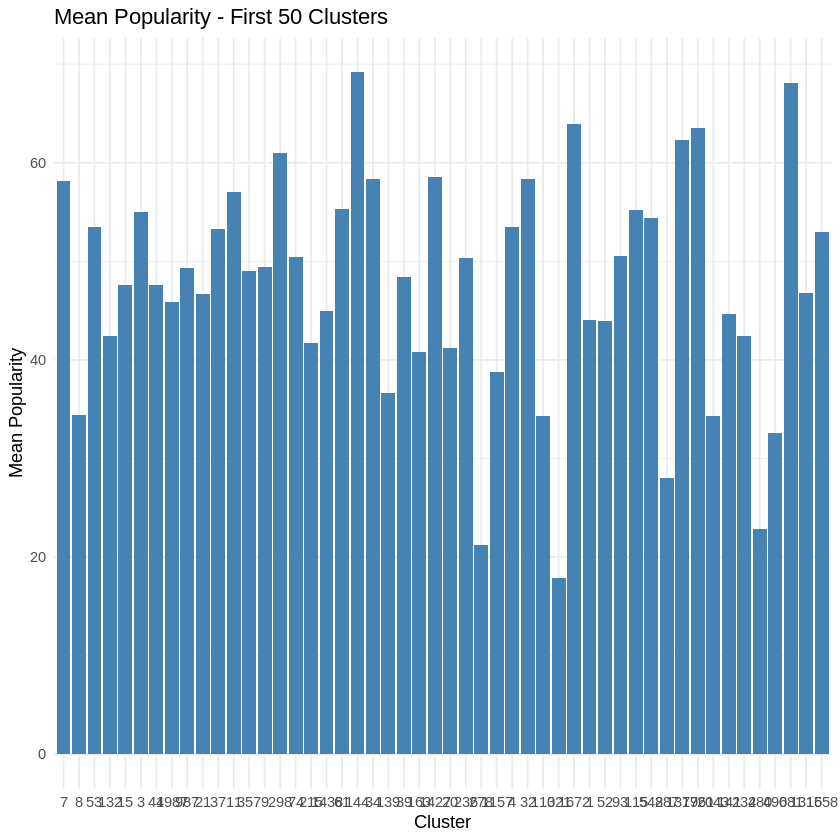

In [ ]:
first_50_clusters <- sorted_clusters[1:50]

subset_mean_popularity <- mean_popularity[mean_popularity$cluster_label %in% first_50_clusters, ]

subset_mean_popularity$cluster_label <- factor(subset_mean_popularity$cluster_label, levels = first_50_clusters)

plt <- ggplot(subset_mean_popularity, aes(x = cluster_label, y = popularity)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Cluster", y = "Mean Popularity") +
  ggtitle("Mean Popularity - First 50 Clusters") +
  theme_minimal()

print(plt)

### -> followers

In [ ]:
mean_followers <- aggregate(followers ~ cluster_label, data = nodes, FUN = mean)

mean_followers

cluster_label followers  
1     1             272012.44 
2     2             753865.60 
3     3             910820.00 
4     4            1088953.21 
5     5             464879.80 
6     6             118377.00 
7     7            1559758.58 
8     8              80282.01 
9     9             635621.00 
10   10            6882514.00 
11   11             569797.88 
12   12             558332.46 
13   13             283367.42 
14   14            4939971.77 
15   15             143351.75 
16   16             328591.00 
17   17              24416.00 
18   18             348187.50 
19   19             354464.33 
20   20              82012.76 
21   21             432033.07 
22   22              85403.50 
23   23             202605.33 
24   24             868856.20 
25   25             943700.25 
26   26            1530394.33 
27   27             244802.00 
28   28             403772.00 
29   29            1422203.83 
30   30            1986031.33 
⋮    ⋮             ⋮          
2681 2681             314.3333
2682 2682              36.0000
2683 2683              56.0000
2684 2684               6.0000
2685 2685           29886.0000
2686 2686              56.0000
2687 2687            1960.0000
2688 2688             399.0000
2689 2689            1594.0000
2690 2690              27.0000
2691 2691            1687.0000
2692 2692           75996.0000
2693 2693            2530.0000
2694 2694            1353.0000
2695 2695             565.0000
2696 2696              20.0000
2697 2697               2.0000
2698 2698          248557.0000
2699 2699            1207.0000
2700 2700              32.0000
2701 2701              23.0000
2702 2702               0.0000
2703 2703            2591.0000
2704 2704             550.0000
2705 2705              11.5000
2706 2706            1638.0000
2707 2707             304.0000
2708 2708            3993.0000
2709 2709             981.0000
2710 2710              17.0000

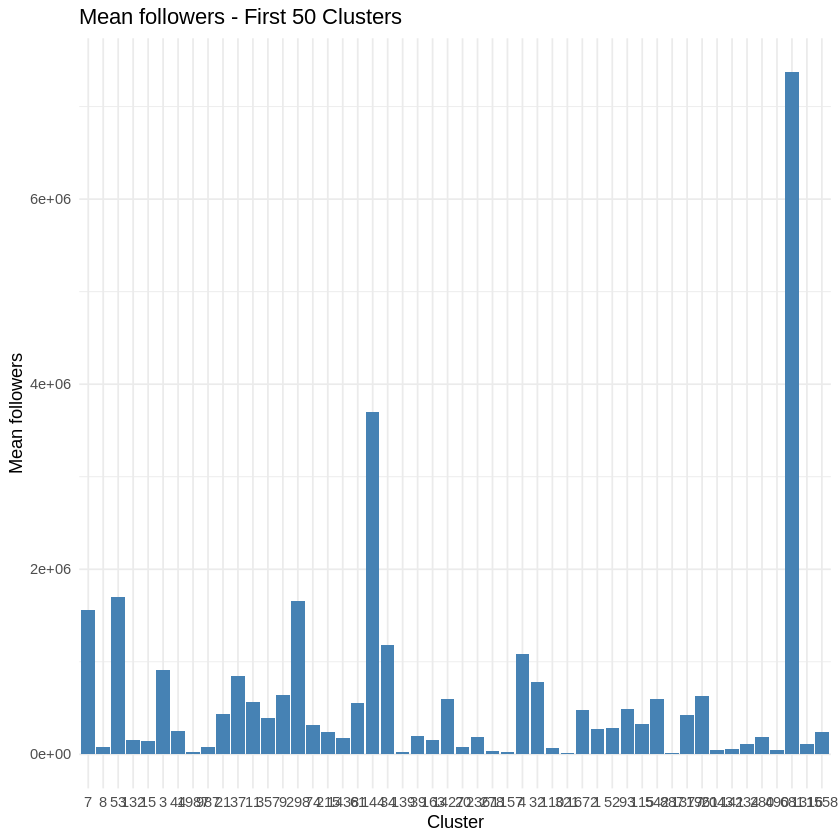

In [ ]:
first_50_clusters <- sorted_clusters[1:50]

subset_mean_followers <- mean_followers[mean_followers$cluster_label %in% first_50_clusters, ]

subset_mean_followers$cluster_label <- factor(subset_mean_followers$cluster_label, levels = first_50_clusters)

plt <- ggplot(subset_mean_followers, aes(x = cluster_label, y = followers)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Cluster", y = "Mean followers") +
  ggtitle("Mean followers - First 50 Clusters") +
  theme_minimal()

print(plt)

### -> num_release

In [ ]:
mean_num_release <- aggregate(num_release ~ cluster_label, data = nodes, FUN = mean)

mean_num_release

cluster_label num_release
1     1             19.111111 
2     2              2.400000 
3     3             36.500000 
4     4             89.526316 
5     5             37.800000 
6     6             44.000000 
7     7             14.248381 
8     8             18.285247 
9     9             23.933333 
10   10             26.000000 
11   11             67.900000 
12   12             52.307692 
13   13             16.000000 
14   14            126.076923 
15   15              9.141304 
16   16              5.111111 
17   17             16.000000 
18   18             10.000000 
19   19             25.666667 
20   20             38.476190 
21   21             60.533333 
22   22             22.500000 
23   23             23.666667 
24   24             61.200000 
25   25             50.250000 
26   26            123.333333 
27   27             20.000000 
28   28             40.500000 
29   29             33.500000 
30   30            107.333333 
⋮    ⋮             ⋮          
2681 2681           1.333333  
2682 2682           2.000000  
2683 2683           1.000000  
2684 2684           1.000000  
2685 2685           1.000000  
2686 2686           5.000000  
2687 2687          22.000000  
2688 2688           2.000000  
2689 2689           0.000000  
2690 2690           0.000000  
2691 2691           1.000000  
2692 2692           2.000000  
2693 2693           1.000000  
2694 2694           0.000000  
2695 2695           1.000000  
2696 2696           0.000000  
2697 2697           1.000000  
2698 2698           2.000000  
2699 2699           2.000000  
2700 2700           0.000000  
2701 2701           0.000000  
2702 2702           0.000000  
2703 2703           5.000000  
2704 2704           1.000000  
2705 2705           2.000000  
2706 2706           2.000000  
2707 2707           6.000000  
2708 2708           3.000000  
2709 2709           0.000000  
2710 2710           1.000000

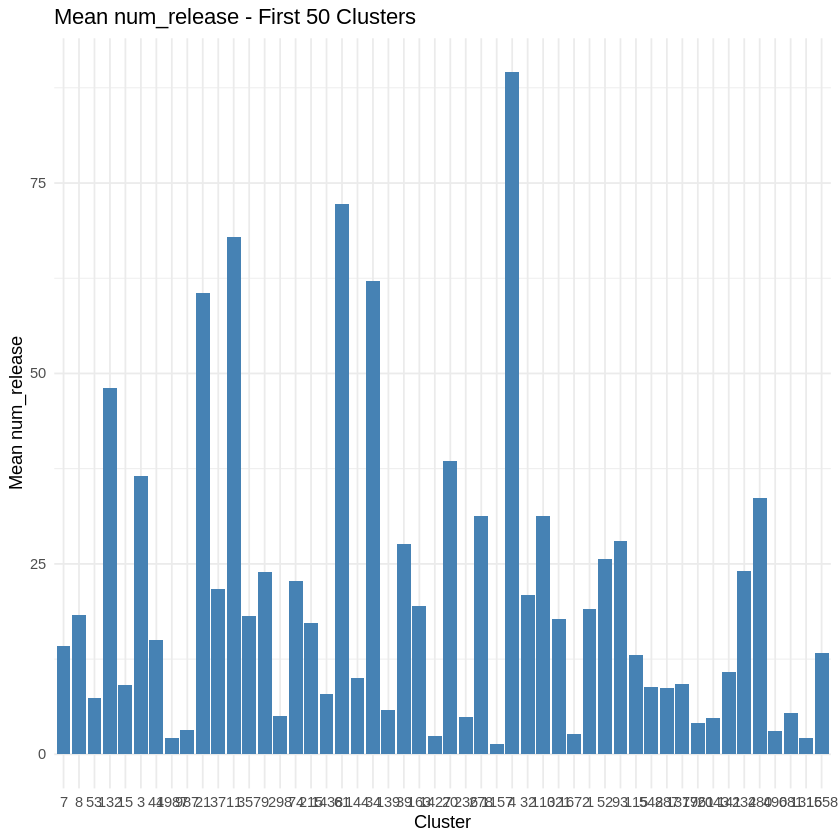

In [ ]:
first_50_clusters <- sorted_clusters[1:50]

subset_mean_num_release <- mean_num_release[mean_num_release$cluster_label %in% first_50_clusters, ]

subset_mean_num_release$cluster_label <- factor(subset_mean_num_release$cluster_label, levels = first_50_clusters)

plt <- ggplot(subset_mean_num_release, aes(x = cluster_label, y = num_release)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Cluster", y = "Mean num_release") +
  ggtitle("Mean num_release - First 50 Clusters") +
  theme_minimal()

print(plt)

### -> experience

In [ ]:
mean_experience <- aggregate(experience ~ cluster_label, data = nodes, FUN = mean)

mean_experience

cluster_label experience 
1     1             6889.611  
2     2              858.800  
3     3            10030.812  
4     4            14576.526  
5     5            11779.600  
6     6             8297.000  
7     7             2884.109  
8     8             7169.224  
9     9             5576.433  
10   10             9469.000  
11   11            14153.300  
12   12             8962.385  
13   13             6305.833  
14   14            14103.154  
15   15             2325.620  
16   16             2107.889  
17   17            13092.000  
18   18             6946.000  
19   19            13734.667  
20   20            20255.905  
21   21            17270.933  
22   22            11290.000  
23   23            17431.333  
24   24            19226.600  
25   25            11416.500  
26   26            20383.000  
27   27            12053.000  
28   28            11253.000  
29   29             7116.333  
30   30            11617.667  
⋮    ⋮             ⋮          
2681 2681             9.333333
2682 2682           738.000000
2683 2683             0.000000
2684 2684             0.000000
2685 2685             0.000000
2686 2686          1765.000000
2687 2687          1221.000000
2688 2688           679.000000
2689 2689             0.000000
2690 2690             0.000000
2691 2691             0.000000
2692 2692           381.000000
2693 2693             0.000000
2694 2694             0.000000
2695 2695             0.000000
2696 2696             0.000000
2697 2697             0.000000
2698 2698           662.000000
2699 2699           147.000000
2700 2700             0.000000
2701 2701             0.000000
2702 2702             0.000000
2703 2703           714.000000
2704 2704             0.000000
2705 2705           737.000000
2706 2706           180.000000
2707 2707           580.000000
2708 2708           698.000000
2709 2709             0.000000
2710 2710             0.000000

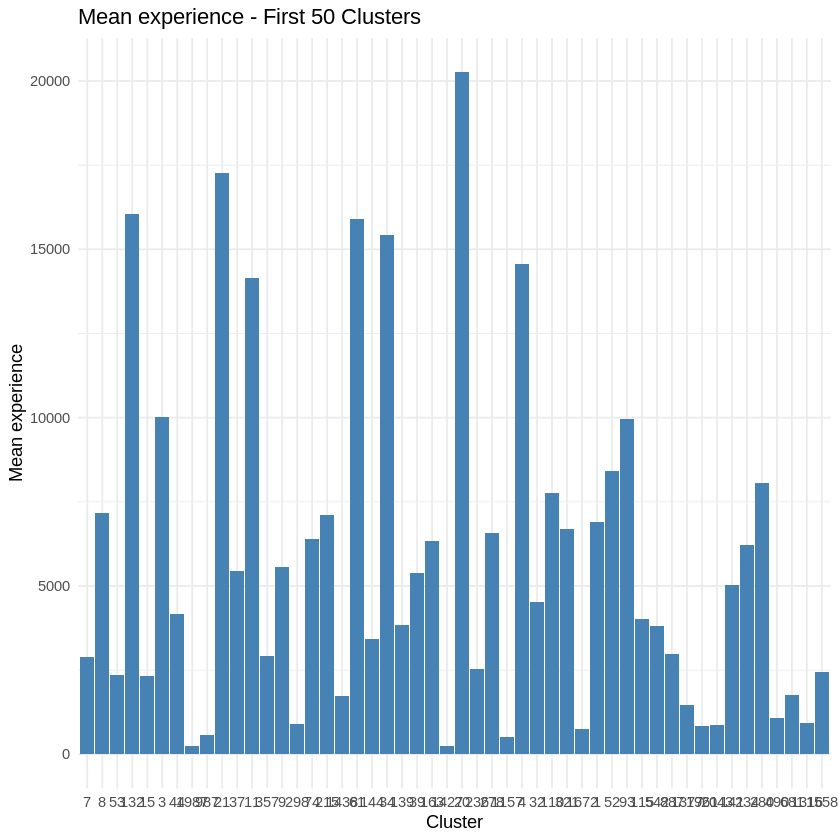

In [ ]:
first_50_clusters <- sorted_clusters[1:50]

subset_mean_experience <- mean_experience[mean_experience$cluster_label %in% first_50_clusters, ]

subset_mean_experience$cluster_label <- factor(subset_mean_experience$cluster_label, levels = first_50_clusters)

plt <- ggplot(subset_mean_experience, aes(x = cluster_label, y = experience)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Cluster", y = "Mean experience") +
  ggtitle("Mean experience - First 50 Clusters") +
  theme_minimal()

print(plt)

### -> pageRank

In [ ]:
mean_pagerank <- aggregate(pagerank ~ cluster_label, data = nodes, FUN = mean)

mean_pagerank

cluster_label pagerank    
1     1            8.180519e-05
2     2            6.403837e-05
3     3            1.063130e-04
4     4            8.999143e-05
5     5            5.657372e-05
6     6            1.296400e-05
7     7            8.910679e-05
8     8            9.493212e-05
9     9            8.062064e-05
10   10            1.296400e-05
11   11            7.503372e-05
12   12            6.842640e-05
13   13            8.290878e-05
14   14            1.135055e-04
15   15            8.597036e-05
16   16            8.331184e-05
17   17            1.296400e-05
18   18            8.642669e-05
19   19            8.642669e-05
20   20            8.337712e-05
21   21            8.359442e-05
22   22            8.642669e-05
23   23            2.173437e-04
24   24            7.487083e-05
25   25            6.110758e-05
26   26            1.218024e-04
27   27            1.296400e-05
28   28            8.728187e-05
29   29            7.565597e-05
30   30            1.133575e-04
⋮    ⋮             ⋮           
2681 2681          8.642669e-05
2682 2682          1.296400e-05
2683 2683          1.296400e-05
2684 2684          1.296400e-05
2685 2685          1.296400e-05
2686 2686          1.296400e-05
2687 2687          1.296400e-05
2688 2688          1.296400e-05
2689 2689          8.642669e-05
2690 2690          1.296400e-05
2691 2691          1.296400e-05
2692 2692          1.296400e-05
2693 2693          1.296400e-05
2694 2694          1.296400e-05
2695 2695          1.296400e-05
2696 2696          1.296400e-05
2697 2697          1.296400e-05
2698 2698          1.296400e-05
2699 2699          1.296400e-05
2700 2700          1.296400e-05
2701 2701          1.296400e-05
2702 2702          1.296400e-05
2703 2703          1.296400e-05
2704 2704          1.296400e-05
2705 2705          8.642669e-05
2706 2706          1.296400e-05
2707 2707          1.296400e-05
2708 2708          1.296400e-05
2709 2709          1.296400e-05
2710 2710          1.296400e-05

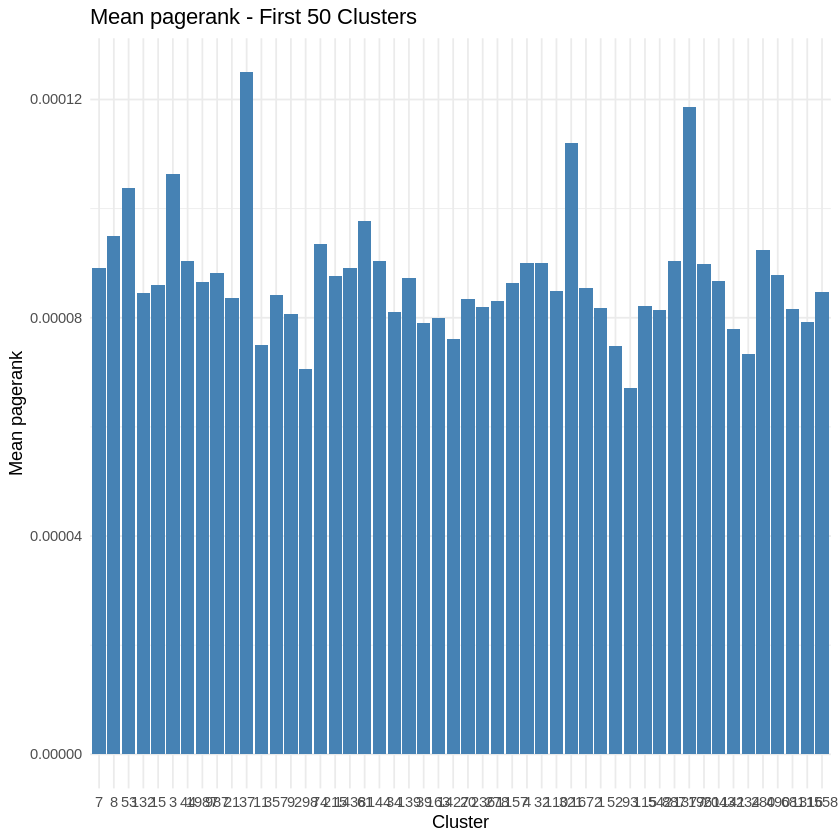

In [ ]:
first_50_clusters <- sorted_clusters[1:50]

subset_mean_pagerank <- mean_pagerank[mean_pagerank$cluster_label %in% first_50_clusters, ]

subset_mean_pagerank$cluster_label <- factor(subset_mean_pagerank$cluster_label, levels = first_50_clusters)

plt <- ggplot(subset_mean_pagerank, aes(x = cluster_label, y = pagerank)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Cluster", y = "Mean pagerank") +
  ggtitle("Mean pagerank - First 50 Clusters") +
  theme_minimal()

print(plt)

### -> degree

In [ ]:
mean_degree <- aggregate(degree ~ cluster_label, data = nodes, FUN = mean)

mean_degree

cluster_label degree    
1     1             10.888889
2     2              9.200000
3     3             27.225000
4     4             21.368421
5     5              5.200000
6     6              0.000000
7     7             19.080381
8     8            232.905696
9     9              9.400000
10   10              0.000000
11   11             14.050000
12   12              8.923077
13   13              9.000000
14   14             67.230769
15   15             14.630435
16   16              9.777778
17   17              0.000000
18   18              2.000000
19   19              4.000000
20   20             29.714286
21   21             28.933333
22   22             20.000000
23   23             68.666667
24   24             12.400000
25   25              5.500000
26   26             28.000000
27   27              0.000000
28   28             18.000000
29   29             15.666667
30   30             38.666667
⋮    ⋮             ⋮         
2681 2681          4         
2682 2682          0         
2683 2683          0         
2684 2684          0         
2685 2685          0         
2686 2686          0         
2687 2687          0         
2688 2688          0         
2689 2689          2         
2690 2690          0         
2691 2691          0         
2692 2692          0         
2693 2693          0         
2694 2694          0         
2695 2695          0         
2696 2696          0         
2697 2697          0         
2698 2698          0         
2699 2699          0         
2700 2700          0         
2701 2701          0         
2702 2702          0         
2703 2703          0         
2704 2704          0         
2705 2705          4         
2706 2706          0         
2707 2707          0         
2708 2708          0         
2709 2709          0         
2710 2710          0

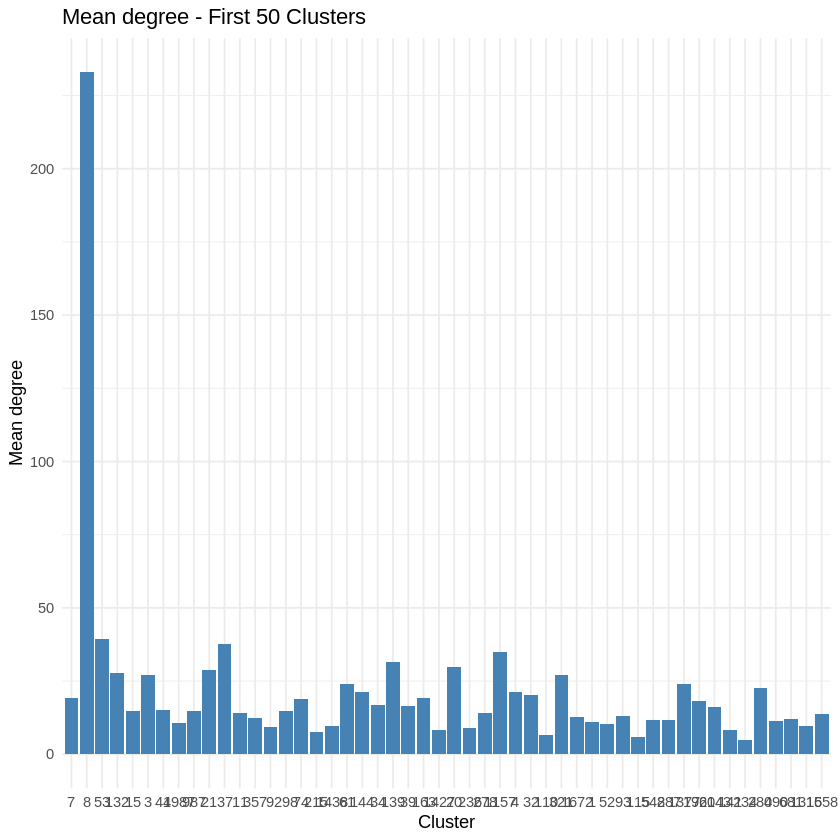

In [ ]:
first_50_clusters <- sorted_clusters[1:50]

subset_mean_degree <- mean_degree[mean_degree$cluster_label %in% first_50_clusters, ]

subset_mean_degree$cluster_label <- factor(subset_mean_degree$cluster_label, levels = first_50_clusters)

plt <- ggplot(subset_mean_degree, aes(x = cluster_label, y = degree)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Cluster", y = "Mean degree") +
  ggtitle("Mean degree - First 50 Clusters") +
  theme_minimal()

print(plt)

### Comparison of average popularity of 2 large clusters

In [ ]:
result_popularity <- t.test(cluster_1_nodes$popularity, cluster_2_nodes$popularity)

test_statistic_popularity <- result_popularity$statistic
p_value_popularity <- result_popularity$p.value

cat("Popularity:\n")
cat("AVG Popularity of cluster 1:\n")
cat(mean(cluster_1_nodes$popularity), "\n")
cat("AVG Popularity of cluster 2:\n")
cat(mean(cluster_2_nodes$popularity), "\n")

if (p_value_popularity < 0.05) {
  cat("There is a significant difference in average popularity between Cluster 1 and Cluster 2.\n")
} else {
  cat("There is no significant difference in average popularity between Cluster 1 and Cluster 2.\n")
}
cat("Test Statistic:", test_statistic_popularity, "\n")
cat("P-Value:", p_value_popularity, "\n\n")

Popularity:
AVG Popularity of cluster 1:
58.04531 
AVG Popularity of cluster 2:
34.57771 
There is a significant difference in average popularity between Cluster 1 and Cluster 2.
Test Statistic: 48.17838 
P-Value: 0 



### Comparison of average followers of 2 large clusters

In [ ]:
result_followers <- t.test(cluster_1_nodes$followers, cluster_2_nodes$followers)

test_statistic_followers <- result_followers$statistic
p_value_followers <- result_followers$p.value

cat("followers:\n")
cat("AVG followers of cluster 1:\n")
cat(mean(cluster_1_nodes$followers), "\n")
cat("AVG followers of cluster 2:\n")
cat(mean(cluster_2_nodes$followers), "\n")

if (p_value_followers < 0.05) {
  cat("There is a significant difference in average followers between Cluster 1 and Cluster 2.\n")
} else {
  cat("There is no significant difference in average followers between Cluster 1 and Cluster 2.\n")
}
cat("Test Statistic:", test_statistic_followers, "\n")
cat("P-Value:", p_value_followers, "\n\n")

followers:
AVG followers of cluster 1:
1525626 
AVG followers of cluster 2:
84135.54 
There is a significant difference in average followers between Cluster 1 and Cluster 2.
Test Statistic: 14.66748 
P-Value: 5.292299e-47 



### Comparison of average num_release of 2 large clusters

In [ ]:
result_num_release <- t.test(cluster_1_nodes$num_release, cluster_2_nodes$num_release)

test_statistic_num_release <- result_num_release$statistic
p_value_num_release <- result_num_release$p.value

cat("num_release:\n")
cat("AVG num_release of cluster 1:\n")
cat(mean(cluster_1_nodes$num_release), "\n")
cat("AVG num_release of cluster 2:\n")
cat(mean(cluster_2_nodes$num_release), "\n")

if (p_value_num_release < 0.05) {
  cat("There is a significant difference in average num_release between Cluster 1 and Cluster 2.\n")
} else {
  cat("There is no significant difference in average num_release between Cluster 1 and Cluster 2.\n")
}
cat("Test Statistic:", test_statistic_num_release, "\n")
cat("P-Value:", p_value_num_release, "\n\n")

num_release:
AVG num_release of cluster 1:
13.92437 
AVG num_release of cluster 2:
18.65066 
There is a significant difference in average num_release between Cluster 1 and Cluster 2.
Test Statistic: -4.043703 
P-Value: 5.394066e-05 



name                 id      isdone spotifyid             
3     ?uestlove             168682 True   1h2OVSKRdJHnVqyCKqCLkf
7     “Weird Al” Yankovic      949 True   1bDWGdIC2hardyt55nlQgG
14    *NSYNC                  2261 True   6Ff53KvcvAj5U7Z1vojB5o
18    $uicideboy$          1242195 True   1VPmR4DJC1PlOtd0IADAO0
19    03 Greedo            1602796 True   0FtsMKmZEq8fBWqdSOWtqp
20    070 Shake            1447081 True   12Zk1DFhCbHY6v3xep2ZjI
23    100 gecs             1777231 True   6PfSUFtkMVoDkx4MQkzOi3
24    1000volts            1724502 True   6MiWYUZOD7VJbJNSx8nUNW
30    112                    20091 True   7urq0VfqxEYEEiZUkebXT4
36    2 Chainz              843338 True   17lzZA2AlOHwCwFALHttmp
38    21 Savage            1277206 True   1URnnhqYAYcrqrcwql10ft
39    220 Kid              1940822 True   4Euia7UzdRshy1DJOSMTcs
40    24hrs                1363225 True   4isewEHTP7Az2QheDdBQ6J
41    24kGoldn             1851042 True   6fWVd57NKTalqvmjRd2t8Z
44    28AV                 1074793 True   0sqDHbUMQqPV9VL6VJaOHn
45    2AM Club              716697 True   1Sjs7s2hvAakgayaa0f34j
47    2KBABY               1954430 True   4mkjpWbFO45SyaHiM9GOVE
49    2Pac                     163 True   1ZwdS5xdxEREPySFridCfh
56    3LW                    31353 True   2lFHVcUeJ9Gq6AZiU3ZAOa
57    3OH!3                 489045 True   0FWzNDaEu9jdgcYTbcOa4F
61    42 Dugg              1879374 True   45gHcnDnMC15sgx3VL7ROG
64    5 Seconds of Summer   981199 True   5Rl15oVamLq7FbSb0NNBNy
65    50 Cent                20544 True   3q7HBObVc0L8jNeTe5Gofh
66    50 Sosa              1722596 True   2GoWYxLeBgr6SdZX0zfF6M
71    645AR                1883791 True   3Iv3mOsjFV8vZkXphpQ8hz
74    6ix9ine              1603703 True   7gZfnEnfiaHzxARJ2LeXrf
75    6LACK                1206587 True   4IVAbR2w4JJNJDDRFP3E83
76    7 Minutes Dead        674001 True   6MXp12IK29WvwsSbj5j49p
77    7 Skies               687683 True   2mmqhYDTD0weseyXUf1QJ5
81    88-Keys               346216 True   6RedK3o51NbUJuJxXlT4kj
⋮     ⋮                    ⋮       ⋮      ⋮                     
12562 Zero 7                 24143 True   14H7ag1wpQOsPPQJOD6Dqr
12566 Zhavia Ward          1660598 True   1CO6e7WRJvSFenmQO8n64C
12568 ZHU                  1101421 True   28j8lBWDdDSHSSt5oPlsX2
12577 Zion.T                986507 True   5HenzRvMtSrgtvU16XAoby
12582 Zoe Wees             1997426 True   03d2mJXSMtuPI0nIvLnhoS
12587 Zomboy                822434 True   0ycHhPwPvoaO4VGzmMnXGq
12588 Zomby                 565387 True   0e1hn6R8UCfLkpHINwAyXR
12589 Zonderling           1032914 True   0bMKf3lIYR9GaNTdFKkTOr
12600 Ελένη Φουρέιρα       1307997 True   39E15l8zeCDYpSZwFNX4G2
12658 Елена Темникова       314184 True   6lPJV4RlngIEnb6OzcwMDL
12667 Коста Лакоста        1752097 True   0QsH0QgYI4uFrC8tkeAXna
12719 Элджей               1710028 True   0Cm90jv892OeEegB3ELmvN
12741 공민지                883898 True   1ql28OzmgulHG2ldXFrbWp
12742 넉살                 1593457 True   6v5cGuRCZKq08nLI4WXJuB
12744 박혜진               1422268 True   6niigcazB2JPcpasZfZvq1
12746 서현                  886615 True   5uM1Et50auro2hTS6ZLcmT
12749 오혁                 1404677 True   68TCVp5t1Dxi2TvNuYoYK0
12750 우주소녀             1334130 True   6hhqsQZhtp9hfaZhSd0VSD
12758 アイドリング!!!       506085 True   4MMquRKVnKJLWy1FW5vVKO
12761 きゃりーぱみゅぱみゅ  816452 True   7Gh6fW49xfXLP8DTWaLVJP
12781 中田ヤスタカ          471939 True   2qNI3aGlywRzTkRBOy9YzG
12787 倖田來未              127100 True   2mGYHril2LuZodRtTX06BC
12792 刘宇宁               1928227 True   5k5iMDK1nWLbb0eqMnpuKl
12817 宇野実彩子            657569 True   7GZ4sfSqYerIzoy01IiBBI
12841 张靓颖                386006 True   7qJmFr579WC8MMGj4PiWdu
12858 東方神起              192168 True   6nVMMEywS5Y4tsHPKx1nIo
12916 莫文蔚                 12290 True   6jlz5QSUqbKE4vnzo2qfP1
12922 袁娅维               1712490 True   70paW48PtCtUjtndElrjrL
12931 酒井法子               68794 True   5O6fCwFxAOAEOtW0FCXNEd
12946 鹿晗                 1176042 True   3fS78kAWd9dVFyaPQ363YO
      genres                                 

### Comparison of average experience of 2 large clusters

In [ ]:
result_experience <- t.test(cluster_1_nodes$experience, cluster_2_nodes$experience)

test_statistic_experience <- result_experience$statistic
p_value_experience <- result_experience$p.value

cat("experience:\n")
cat("AVG experience of cluster 1:\n")
cat(mean(cluster_1_nodes$experience), "\n")
cat("AVG experience of cluster 2:\n")
cat(mean(cluster_2_nodes$experience), "\n")

if (p_value_experience < 0.05) {
  cat("There is a significant difference in average experience between Cluster 1 and Cluster 2.\n")
} else {
  cat("There is no significant difference in average experience between Cluster 1 and Cluster 2.\n")
}
cat("Test Statistic:", test_statistic_experience, "\n")
cat("P-Value:", p_value_experience, "\n\n")

experience:
AVG experience of cluster 1:
2810.24 
AVG experience of cluster 2:
7321.052 
There is a significant difference in average experience between Cluster 1 and Cluster 2.
Test Statistic: -25.06699 
P-Value: 9.245606e-126 



# **PART 8**

In [ ]:
pop_rows <- nodes[grep("'pop'", nodes$genres), ]

pop_rows

name                id      isdone spotifyid             
64    5 Seconds of Summer  981199 True   5Rl15oVamLq7FbSb0NNBNy
82    88rising            1692158 True   1AhjOkOLkbHUfcHDSErXQs
91    A Great Big World    996953 True   5xKp3UyavIBUsGy3DQdXeF
93    A R I Z O N A       1393752 True   7hOGhpa8RMSuDOWntGIAJt
111   Aaliyah                 358 True   0urTpYCsixqZwgNTkPJOJ4
168   Adam Hicks           877181 True   3dctbbXhrRgigX1icexnws
177   Adele                497084 True   4dpARuHxo51G3z768sgnrY
250   AJ Mitchell         1784321 True   6dn6x1XOng3LOAnfTjUn77
323   Alec Benjamin       1477650 True   5IH6FPUwQTxPSXurCrcIov
341   Alessia Cara        1241665 True   2wUjUUtkb5lvLKcGKsKqsR
342   Alesso               805610 True   4AVFqumd2ogHFlRbKIjp1t
345   Alex & Sierra       1065144 True   58MLl9nC29IXbE4nEtuoP2
375   Alexander 23        1858681 True   6sFHvCyqklnJpXC9Nh1aag
426   Alicia Keys           24018 True   3DiDSECUqqY1AuBP8qtaIa
427   Alina Baraz         1066704 True   6hfwwpXqZPRC9CsKI7qtv1
451   Allie X             1215810 True   0wnYgCeP013HkKoOyC5V32
457   ALMA                1067763 True   6c0mTNAxJxlp9HpKTUZwA8
472   Aly & AJ             359309 True   5wugb0kaq0J6nyQ5Xgd17i
508   American Authors     972925 True   0MlOPi3zIDMVrfA9R04Fe3
516   Aminé               1404279 True   3Gm5F95VdRxW3mqCn8RPBJ
616   Andy Grammer         778881 True   2oX42qP5ineK3hrhBECLmj
672   Anna Clendening     1428873 True   2y9j8qUwBMGPYPQJJxmYzD
689   Anne‐Marie          1247518 True   1zNqDE7qDGCsyzJwohVaoX
713   Ant Saunders        1922411 True   4jpsw9CQS439N0B7SecMgf
787   Arca                 996139 True   4SQdUpG4f7UbkJG3cJ2Iyj
803   Ari Lennox          1257421 True   1vaQ6v3pOFxAIrFoPrAcom
806   Ariana Grande        823336 True   66CXWjxzNUsdJxJ2JdwvnR
877   Ashe                1541463 True   6P5NO5hzJbuOqSdyPB7SJM
882   Ashley Tisdale       359331 True   2ddxtfC0oS8LoktXUHE7YL
884   Ashnikko            1779514 True   3PyJHH2wyfQK3WZrk9rpmP
⋮     ⋮                   ⋮       ⋮      ⋮                     
11790 Transviolet         1297922 True   7ixzNQXQ64I2ayrtyhlF7i
11807 Trevor Daniel       1851043 True   7uaIm6Pw7xplS8Dy06V6pT
11816 Trey Songz           217006 True   2iojnBLj0qIMiKPvVhLnsH
11848 Troye Sivan          803566 True   3WGpXCj9YhhfX11TToZcXP
11880 Two Feet            1377277 True   5sWHDYs0csV6RS48xBl0tH
11955 UPSAHL              1464420 True   1294QqYm1VuxxjRiL9M0h9
11963 Usher                 11553 True   23zg3TcAtWQy7J6upgbUnj
11998 Vance Joy            998861 True   10exVja0key0uqUkk6LJRT
12006 Vanessa Hudgens      359338 True   6G9bygHlCyPgNGxK2l3YdE
12030 VÉRITÉ              1204046 True   1Fr6agZ6iSM5Ynn2k4C8sc
12070 Victoria Monét       907526 True   63XBtGSEZINSyXylZxEUbv
12152 Wale                 528363 True   67nwj3Y5sZQLl72VNUHEYE
12155 Wallows             1501771 True   0NIPkIjTV8mB795yEIiPYL
12237 Whitney Houston         979 True   6XpaIBNiVzIetEPCWDvAFP
12274 will.i.am             84601 True   085pc2PYOi8bGKj0PNjekA
12293 William Singe        956710 True   5exS0bytCYdixgv02DaCm3
12299 WILLOW               743338 True   3rWZHrfrsPBxVy692yAIxF
12313 Winona Oak          1633457 True   3XC57xz74X3xUi1hv4mge1
12357 Wrabel              1096837 True   7r2uG6BlFXKcwmh9ItqlII
12368 X Ambassadors       1007140 True   3NPpFNZtSTHheNBaWC82rB
12385 XYLØ                1209409 True   6ioOEWNNGK40H8xrGj6XPW
12417 Years & Years        771509 True   5vBSrE1xujD2FXYRarbAXc
12507 YUNGBLUD            1496164 True   6Ad91Jof8Niiw0lGLLi3NW
12525 Zachary Knowles     1945576 True   5BxcZnUcETSt90VlbsdugI
12535 Zara Larsson         964089 True   1Xylc3o4UrD53lo9CvFvVg
12542 ZAYN                 754693 True   5ZsFI1h6hIdQRw2ti0hz81
12550 Zedd                 768034 True   2qxJFvFYMEDqd7ui6kSAcq
12557 Zella Day           1139485 True   100sLnojEpcadRx4edEBA6
12559 Zendaya              852915 True   6sCbFbEjbYepqswM1vWjjs
12566 Zhavia Ward         1660598 True   1CO6e7WRJvSFenmQO8n64C
      genres                          

In [ ]:
hip_hop_rows <- nodes[grep("'hip hop'", nodes$genres), ]

hip_hop_rows

name                 id      isdone spotifyid             
36    2 Chainz              843338 True   17lzZA2AlOHwCwFALHttmp
49    2Pac                     163 True   1ZwdS5xdxEREPySFridCfh
65    50 Cent                20544 True   3q7HBObVc0L8jNeTe5Gofh
75    6LACK                1206587 True   4IVAbR2w4JJNJDDRFP3E83
95    A Tribe Called Quest   92744 True   09hVIj6vWgoCDtT03h8ZCa
104   A$AP Ferg             838293 True   5dHt1vcEm9qb8fCyLcB3HL
105   A$AP Mob              921434 True   7yO4IdJjCEPz7YgZMe25iS
106   A$AP Rocky            838288 True   13ubrt8QOOCPljQ2FL1Kca
120   Ab‐Soul               824871 True   0g9vAlRPK9Gt3FKCekk4TW
152   Ace Hood              530018 True   31HjiqargV4NAw4GZqUale
159   Action Bronson        801962 True   7BMccF0hQFBpP6417k1OtQ
203   Aesop Rock             32506 True   2fSaE6BXtQy0x7R7v9IOmZ
512   Amerie                 49461 True   08rMCq2ek1YjdDBsCPVH2s
516   Aminé                1404279 True   3Gm5F95VdRxW3mqCn8RPBJ
876   Ashanti                41057 True   5rkVyNGXEgeUqKkB5ccK83
1012  B.o.B                 596411 True   5ndkK3dpZLKtBklKjxNQwT
1048  BADBADNOTGOOD         835782 True   65dGLGjkw3UbddUg2GKQoZ
1118  Bas                  1125382 True   70gP6Ry4Uo0Yx6uzPIdaiJ
1153  Beanie Sigel           11226 True   0tCtGc5vt29zFZp6KXzN50
1156  Beastie Boys            9606 True   03r4iKL2g2442PT9n2UKsx
1236  Benny the Butcher    1571610 True   5Matrg5du62bXwer29cU5T
1295  Big Boi               244357 True   2ht3wxeT69CzyKFChNnNAB
1305  Big K.R.I.T.          772684 True   0CKa42Jqrc9fSFbDjePaXP
1306  Big L                  36964 True   30fiiwr2EeZp1tAhzYCmyM
1310  Big Pun               132193 True   2Xu7q46Hf02xOoEIm4E1Qs
1314  Big Sean              450754 True   0c173mlxpT3dSFRgMO8XPh
1328  Bilal                  46618 True   4jCbgl5Dmt3uOh8WRQfpPs
1395  BJ the Chicago Kid    805795 True   07d5etnpjriczFBB8pxmRe
1420  Black Rob              15387 True   1QPZhx0asYTBxD5RDqfU49
1423  Black Thought          53990 True   6DJEUXZm0e2rAohdoZ5Voo
⋮     ⋮                    ⋮       ⋮      ⋮                     
11869 Tweet                  41282 True   6zDBeei6hHRiZdAJ6zoTCo
11873 Twista                 50270 True   6vbY3hOaCAhC7VjucswgdS
11890 Tyga                  531656 True   5LHRHt1k9lMyONurDHEdrp
11895 Tyler, the Creator    767971 True   4V8LLVI7PbaPR0K2TGSxFF
11900 Tyrese                 20620 True   08p7B5OtcUuVblvkQIlBhJ
11918 UGK                   304175 True   6ZhjJOJXXwnPS8PrXdmjLw
11927 Ultramagnetic MC’s     30736 True   52ik8mwcuZ4ISphAkejj2Z
12051 Vic Mensa             873735 True   27w1NoOLMX7tJMYqcetPyG
12087 Vince Staples         915508 True   68kEuyFKyqrdQQLLsmiatm
12147 Waka Flocka Flame     688686 True   6f4XkbvYlXMH0QgVRzW0sM
12152 Wale                  528363 True   67nwj3Y5sZQLl72VNUHEYE
12169 Warren G                 534 True   2B4ZHz4QDWJTXPFPgO5peE
12214 Westside Gunn        1178268 True   0ABk515kENDyATUdpCKVfW
12273 Will Smith               375 True   41qil2VaGbD194gaEcmmyx
12325 Wiz Khalifa           463597 True   137W8MRPWKqSmrBGDBFSop
12359 Wu‐Tang Clan            2504 True   34EP7KEpOjXcM2TCat1ISk
12386 Xzibit                   535 True   4tujQJicOnuZRLiBFdp3Ou
12419 Yelawolf              701014 True   68DWke2VjdDmA75aJX5C57
12420 Yella Beezy          1198019 True   7kwCkEJ384PWm0UQW3hxjS
12435 YG                    599382 True   0A0FS04o6zMoto8OKPsDwY
12439 Ying Yang Twins        52134 True   44PA0rCQXikgOWbfY7Fq7m
12448 Yo Gotti              253598 True   6Ha4aES39QiVjR0L2lwuwq
12466 Young Buck            149754 True   4pr7J7wzgObkE3DD3Izi7q
12468 Young Dolph           963869 True   3HiuzBlSW7pGDXlSFMhO2g
12471 Young Money           624857 True   5OrB6Jhhrl9y2PK0pSV4VP
12473 Young Nudy           1554751 True   5yPzzu25VzEk8qrGTLIrE1
12475 Young Thug            998368 True   50co4Is1HCEo8bhOyUWKpn
12527 Zack Fox             1837569 True   1UH80jhsYsFztK0anu2FNS
12573 Zion I                 33767 True   3LLs28LJVlXAjWc8UDkcQZ
12574 Zion I                 33767 True  

In [ ]:
classical_rows <- nodes[grep("'classical'", nodes$genres), ]

classical_rows

name                               id     isdone spotifyid             
115   Aaron Copland                       23034 True   0nJvyjVTb8sAULPYyA1bqU
141   Academy of Ancient Music           238755 True   60adCptqwRkANTtVja0bvf
288   Alan Hovhaness                      11457 True   1nLYb4XbZumQcIqwEmYlli
305   Alban Berg                          47856 True   60ju8DuNEmkdLw3ymddLje
338   Alessandro Scarlatti                53486 True   5HGksnSVY91s4g1SOHHACw
740   Anton Bruckner                      16210 True   2bM3j1JQWBkmzuoZKu4zj2
744   Anton Webern                        48153 True   6cg7ooZDeSSLYVTWGpASjX
746   Antonín Dvořák                      10729 True   6n7nd5iceYpXVwcx8VPpxF
753   Antonio Salieri                     37382 True   4zAMiCvE5KTXuTHxi56cPE
754   Antonio Vivaldi                     24465 True   2QOIawHpSlOwXDvSqQ9YJR
793   Arcangelo Corelli                   32473 True   5dmMpIyAVaH6b9FLFgWPrF
801   Arditti Quartet                    377115 True   1A6VSPPUJADy9l9nHcGFG5
829   Arnold Schönberg                   133070 True   5U827e4jbYz6EjtN0fIDt9
852   Arthur Honegger                    136995 True   0QDRLNPr0wXKeR5ThXZAUp
853   Arthur Rubinstein                  163981 True   5N1GUHhFMRFFgMTjSOJDb9
867   Arvo Pärt                           21922 True   2P6ygesd9xg5DPOBnda2jg
1171  Bedřich Smetana                     32512 True   25Eab1kIY1gh0Yo1oV04G4
1180  Béla Bartók                         21361 True   5zyNXVd952fWOjkdGHCvPd
1220  Benjamin Britten                    12439 True   7MJ1pB5d6Vjmzep2zQlorn
1527  Bohuslav Martinů                    46261 True   2cN9SgfyZo6l6TijoewUaZ
1833  Camille Saint‐Saëns                 10289 True   436sYg6CZhNefQJogaXeK0
1877  Carl Maria von Weber                37544 True   1p6wR69pnH9LBWZvwliuz2
1879  Carl Nielsen                        23385 True   73I7vbj7hzsw8rW4LUoxtz
1880  Carl Orff                           20000 True   4LXxsm5BF85PWnQ1dUDAze
1882  Carl Philipp Emanuel Bach          169078 True   3meioy7GWDwpwmjv2LPyAb
1897  Carlo Gesualdo                     145273 True   7wi1x9DxLtqnhzJIQa7JQF
2012  César Franck                        45916 True   1C3sffOOvQNUwg4YIsvKqy
2054  Charles Gounod                      32797 True   42Vmza0WYHdhsgxFmf9Tui
2056  Charles Ives                        41969 True   73s17iW5LTtXRMVoofi9sU
2132  Chicago Symphony Orchestra           9739 True   6TD08jYeuN128P2MZTbc8E
⋮     ⋮                                  ⋮      ⋮      ⋮                     
11279 The Hilliard Ensemble                9629 True   0L8W3JzyTX29RLKZgc3bqS
11439 The Sixteen                        401218 True   5y9NnD1AZPcBVbDluRgiXS
11464 The Tallis Scholars                 38978 True   3vENFkiF5PZRluBBtQiwcG
11544 Thomas Morley                      214889 True   6nLcghsTUtvQzu7aiu8HbO
11551 Thomas Tallis                       81082 True   1XmMnFJ9jhW4tI7bQuNYFG
11698 Tomaso Giovanni Albinoni            24245 True   17OArJzEhRR3OmhtGcnfBq
11930 Umberto Giordano                    46024 True   2vedxcgUX1uom0dCE4xTTj
12094 Vincenzo Bellini                    15697 True   6AphpMkKDU4I3Z6XaGu1UV
12119 Vladimir Ashkenazy                 125970 True   20iZXzMb8LoWXOeca32i82
12121 Vladimir Horowitz                   37248 True   4Ws5hSoABAwvGJ4LhHwHgq
12160 Walter Süsskind                    321981 True   6zgla7izAy39uJS1BlWCno
12295 William Walton                     163969 True   6RsX7qYw5KVKiOjS8BxjL5
12322 Witold Lutosławski                  54733 True   5Ks8fS8lZJnTFbtvxkDOkM
12332 Wolfgang Amadeus Mozart             11285 True   4NJhFmfw43RLBLjQvxDuRS
12584 Zoltán Kodály                      138879 True   7MjAFDEchgyC28I0asclTE
12618 Александр Порфирьевич Бородин       24516 True   34MYamymtmnsmpwbqydd7I
12622 Альфред Гарриевич Шнитке           168796 True   7A29QKpDvdkEuTM6vcY17z
12624 Антон Григорьевич Рубинштейн        48307 True   01ngcjkCXOFGBB3UVG3saM
12627 Валерий Абисалович Гергиев         104779 True   2LxnoYPOe0FCLC82R3xgO2
12649 Дмитрий Дмитриевич Шос

### Number of Songs:

In [ ]:
avg_songs_pop <- mean(pop_rows$num_release)
avg_songs_hiphop <- mean(hip_hop_rows$num_release)
avg_songs_classical <- mean(classical_rows$num_release)

cat("Average number of songs - Pop:", avg_songs_pop, "\n")
cat("Average number of songs - Hip Hop:", avg_songs_hiphop, "\n")
cat("Average number of songs - Classical:", avg_songs_classical, "\n")

Average number of songs - Pop: 23.16842 
Average number of songs - Hip Hop: 31.74 
Average number of songs - Classical: 71.95789 


### years of experience:

In [ ]:
avg_exp_pop <- mean(pop_rows$experience)
avg_exp_hiphop <- mean(hip_hop_rows$experience)
avg_exp_classical <- mean(classical_rows$experience)

cat("Average years of experience - Pop:", avg_exp_pop, "\n")
cat("Average years of experience - Hip Hop:", avg_exp_hiphop, "\n")
cat("Average years of experience - Classical:", avg_exp_classical, "\n")

Average years of experience - Pop: 2800.813 
Average years of experience - Hip Hop: 5845.707 
Average years of experience - Classical: 17615.65 


### number of collaborations:

In [ ]:
avg_collaborations_pop <- mean(pop_rows$degree)
avg_collaborations_hiphop <- mean(hip_hop_rows$degree)
avg_collaborations_classical <- mean(classical_rows$degree)

cat("Average number of collaborations - Pop:", avg_collaborations_pop, "\n")
cat("Average number of collaborations - Hip Hop:", avg_collaborations_hiphop, "\n")
cat("Average number of collaborations - Classical:", avg_collaborations_classical, "\n")

Average number of collaborations - Pop: 37.33053 
Average number of collaborations - Hip Hop: 41.66 
Average number of collaborations - Classical: 1212.968 


### followers

In [ ]:
avg_followers_pop <- mean(pop_rows$followers)
avg_followers_hiphop <- mean(hip_hop_rows$followers)
avg_followers_classical <- mean(classical_rows$followers)

cat("Average number of followers - Pop:", avg_followers_pop, "\n")
cat("Average number of followers - Hip Hop:", avg_followers_hiphop, "\n")
cat("Average number of followers - Classical:", avg_followers_classical, "\n")

Average number of followers - Pop: 4992242 
Average number of followers - Hip Hop: 2300181 
Average number of followers - Classical: 201959.7 


### popularity

In [ ]:
avg_popularity_pop <- mean(pop_rows$popularity)
avg_popularity_hiphop <- mean(hip_hop_rows$popularity)
avg_popularity_classical <- mean(classical_rows$popularity)

cat("Average number of popularity - Pop:", avg_popularity_pop, "\n")
cat("Average number of popularity - Hip Hop:", avg_popularity_hiphop, "\n")
cat("Average number of popularity - Classical:", avg_popularity_classical, "\n")

Average number of popularity - Pop: 74.00842 
Average number of popularity - Hip Hop: 67.54 
Average number of popularity - Classical: 48.93158 


# **PART 9**

## Calculating clustering coefficient for the observed network

In [ ]:
clustering_coef <- transitivity(graph)
cat(clustering_coef)

0.1941773

## Generating random graphs and calculating clustering coefficient for them
(Using the Erdos-Rényi (ER) model to generate random networks with the same number of nodes and edge density as the observed network:)


In [ ]:
num_nodes <- vcount(graph)
edge_density <- ecount(graph) / choose(num_nodes, 2)

# number of random graphs to generate
num_networks <- 100

# a list to store the random graphs
random_networks <- vector("list", num_networks)
random_clustering_coeffs <- vector("numeric", num_networks)
random_clustering_mean_distance <- vector("numeric", num_networks)


# random graphs with the same properties
for (i in 1:num_networks) {
  random_graph <- erdos.renyi.game(n = num_nodes, p = edge_density, directed = FALSE, loops = FALSE)
  random_networks[[i]] <- random_graph
  random_clustering_coeffs[i] <- transitivity(random_graph)
}


for (i in 1:num_networks) {
  cat("Random Network", i, ":\n")
  print(random_networks[[i]])
  cat("\n")
}

Random Network 1 :
IGRAPH 6a114ad U--- 12905 321770 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 6a114ad:
 [1]   7-- 12   1-- 14   9-- 30  21-- 33  29-- 46  21-- 48  52-- 53  41-- 61
 [9]   2-- 65  46-- 77   2-- 95  20-- 97  51--102  50--103  16--110  19--116
[17]  51--120  36--122  31--124  40--124 110--126 124--128  28--130  97--130
[25]  46--131 119--133  82--139 130--140  99--141 139--141 102--143 105--143
[33]  31--146  65--147   3--149  31--150 137--152 141--152 137--153  98--160
[41]  29--163 156--163   3--165  33--167  53--167  98--170 148--170 138--172
[49]  79--175 144--177  34--178 101--180  69--185 180--192  34--193  15--196
[57]  77--196 129--196  11--197  18--198  44--198  40--199  13--200 129--202
+ ... omitted several edges

Random Network 2 :
IGRAPH 8d5fa02 U--- 12905 321886 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 8d5fa02:
 [1]  19-- 28  12-- 44  38-- 61  15-- 62  39-- 

In [ ]:
p_value_coeff <- wilcox.test(clustering_coef, random_clustering_coeffs)$p.value

p_value_coeff

[1] 0.08953872